In [40]:

import numpy as np
import pandas as pd 


In [41]:
df=pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')

In [42]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [43]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [45]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [46]:
# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


In [47]:
# Unique values in each column
print("\nUnique values per column:")
for i in df.columns:
    dis = len(df[i].unique())
    print(f"{i} - {dis}")


Unique values per column:
loan_id - 4269
 no_of_dependents - 6
 education - 2
 self_employed - 2
 income_annum - 98
 loan_amount - 378
 loan_term - 10
 cibil_score - 601
 residential_assets_value - 278
 commercial_assets_value - 188
 luxury_assets_value - 379
 bank_asset_value - 146
 loan_status - 2


# FEATURE ENGINEERING

In [48]:
# 1. Total Assets (assets are known before approval)
df['total_assets'] = (df[' residential_assets_value'] + 
                      df[' commercial_assets_value'] + 
                      df[' luxury_assets_value'] + 
                      df[' bank_asset_value'])

In [49]:
# 2. Income per Dependent (demographic feature)
df['income_per_dependent'] = df[' income_annum'] / (df[' no_of_dependents'] + 1)


In [50]:
# 3. Asset Diversity Score (how diversified are assets)
df['asset_diversity'] = ((df[' residential_assets_value'] > 0).astype(int) +
                         (df[' commercial_assets_value'] > 0).astype(int) +
                         (df[' luxury_assets_value'] > 0).astype(int) +
                         (df[' bank_asset_value'] > 0).astype(int))

In [51]:
# 4. CIBIL Score Category (binning credit scores)
df['cibil_category'] = pd.cut(df[' cibil_score'], 
                               bins=[0, 500, 650, 750, 900],
                               labels=[0, 1, 2, 3]).astype(float)

In [52]:
# 5. Loan Term Category (short/medium/long term)
df['loan_term_category'] = pd.cut(df[' loan_term'],
                                   bins=[0, 6, 12, 20],
                                   labels=[0, 1, 2]).astype(float)

In [53]:
# 6. Asset to Income Ratio (financial stability indicator)
df['asset_to_income_ratio'] = df['total_assets'] / (df[' income_annum'] + 1)

In [54]:
# 7. High Value Asset Flag (has significant luxury assets)
df['high_luxury_assets'] = (df[' luxury_assets_value'] > df[' luxury_assets_value'].median()).astype(int)

print(f"\n✅ Feature engineering complete!")
print(f"New shape: {df.shape}")

new_features = ['total_assets', 'income_per_dependent', 'asset_diversity', 
                'cibil_category', 'loan_term_category', 'asset_to_income_ratio',
                'high_luxury_assets']

print("\nNew features added:")
for feat in new_features:
    print(f"  - {feat}")

print("\nSample of engineered features:")
print(df[new_features].head())


✅ Feature engineering complete!
New shape: (4269, 20)

New features added:
  - total_assets
  - income_per_dependent
  - asset_diversity
  - cibil_category
  - loan_term_category
  - asset_to_income_ratio
  - high_luxury_assets

Sample of engineered features:
   total_assets  income_per_dependent  asset_diversity  cibil_category  \
0      50700000          3.200000e+06                4             3.0   
1      17000000          4.100000e+06                4             0.0   
2      57700000          2.275000e+06                4             1.0   
3      52700000          2.050000e+06                4             0.0   
4      55000000          1.633333e+06                4             0.0   

   loan_term_category  asset_to_income_ratio  high_luxury_assets  
0                 1.0               5.281249                   1  
1                 1.0               4.146340                   0  
2                 2.0               6.340659                   1  
3                 1.0     

# ENCODING CATEGORICAL DATA


In [55]:
from sklearn.preprocessing import LabelEncoder

# Check data types before encoding
print("\nData types BEFORE encoding:")
print(df.dtypes)

# Check which columns are categorical
object_cols = df.select_dtypes(include='object').columns.tolist()
print(f"\nCategorical columns found: {object_cols}")


Data types BEFORE encoding:
loan_id                        int64
 no_of_dependents              int64
 education                    object
 self_employed                object
 income_annum                  int64
 loan_amount                   int64
 loan_term                     int64
 cibil_score                   int64
 residential_assets_value      int64
 commercial_assets_value       int64
 luxury_assets_value           int64
 bank_asset_value              int64
 loan_status                  object
total_assets                   int64
income_per_dependent         float64
asset_diversity                int64
cibil_category               float64
loan_term_category           float64
asset_to_income_ratio        float64
high_luxury_assets             int64
dtype: object

Categorical columns found: [' education', ' self_employed', ' loan_status']


In [56]:
# 1. Encode TARGET variable (loan_status)
le_target = LabelEncoder()
df[' loan_status'] = le_target.fit_transform(df[' loan_status'])
print(f"\n✅ Target (loan_status) encoding:")
print(f"   {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")



✅ Target (loan_status) encoding:
   {' Approved': 0, ' Rejected': 1}


In [57]:
# 2. Encode EDUCATION
le_edu = LabelEncoder()
df[' education'] = le_edu.fit_transform(df[' education'])
print(f"\n✅ Education encoding:")
print(f"   {dict(zip(le_edu.classes_, le_edu.transform(le_edu.classes_)))}")


✅ Education encoding:
   {' Graduate': 0, ' Not Graduate': 1}


In [58]:
# 3. Encode SELF_EMPLOYED
le_emp = LabelEncoder()
df[' self_employed'] = le_emp.fit_transform(df[' self_employed'])
print(f"\n✅ Self-employed encoding:")
print(f"   {dict(zip(le_emp.classes_, le_emp.transform(le_emp.classes_)))}")

# Verification
print("\n" + "="*60)
print("VERIFICATION CHECK")
print("="*60)

print("\nData types AFTER encoding:")
print(df.dtypes)

object_cols_after = df.select_dtypes(include='object').columns.tolist()
if len(object_cols_after) > 0:
    print(f"\n❌ ERROR: These columns are still non-numeric: {object_cols_after}")
else:
    print("\n✅ SUCCESS: All columns are now numeric!")

print(f"\nDataFrame shape: {df.shape}")
print("\nFirst 3 rows after encoding:")
print(df.head(3))


✅ Self-employed encoding:
   {' No': 0, ' Yes': 1}

VERIFICATION CHECK

Data types AFTER encoding:
loan_id                        int64
 no_of_dependents              int64
 education                     int64
 self_employed                 int64
 income_annum                  int64
 loan_amount                   int64
 loan_term                     int64
 cibil_score                   int64
 residential_assets_value      int64
 commercial_assets_value       int64
 luxury_assets_value           int64
 bank_asset_value              int64
 loan_status                   int64
total_assets                   int64
income_per_dependent         float64
asset_diversity                int64
cibil_category               float64
loan_term_category           float64
asset_to_income_ratio        float64
high_luxury_assets             int64
dtype: object

✅ SUCCESS: All columns are now numeric!

DataFrame shape: (4269, 20)

First 3 rows after encoding:
   loan_id   no_of_dependents   education   se

### CHECK FOR DATA LEAKAGE

In [59]:
# Calculate correlation with target
correlation_with_target = df.corr()[' loan_status'].abs().sort_values(ascending=False)

print("\nTop 15 features correlated with target:")
print(correlation_with_target.head(15))


Top 15 features correlated with target:
 loan_status                 1.000000
 cibil_score                 0.770518
cibil_category               0.734382
 loan_term                   0.113036
loan_term_category           0.108485
asset_to_income_ratio        0.024357
 no_of_dependents            0.018114
loan_id                      0.017685
 loan_amount                 0.016150
 luxury_assets_value         0.015465
 income_annum                0.015189
 residential_assets_value    0.014367
high_luxury_assets           0.014216
total_assets                 0.011281
 commercial_assets_value     0.008246
Name:  loan_status, dtype: float64


In [60]:
# Check for potential leakage (correlation > 0.85)
high_corr_features = correlation_with_target[correlation_with_target > 0.85].index.tolist()
high_corr_features = [f for f in high_corr_features if f != ' loan_status']

if len(high_corr_features) > 0:
    print(f"\n⚠️ WARNING: Potential data leakage detected!")
    print(f"Features with >0.85 correlation with target:")
    for feat in high_corr_features:
        print(f"   - {feat}: {correlation_with_target[feat]:.4f}")
    
    # Remove leaky features
    print(f"\n🔧 Removing leaky features...")
    df = df.drop(columns=high_corr_features)
    print(f"✅ Removed {len(high_corr_features)} features")
    print(f"New shape: {df.shape}")
else:
    print("\n✅ No data leakage detected (all correlations < 0.85)")


✅ No data leakage detected (all correlations < 0.85)


# VISUALIZATION & CORRELATION ANALYSIS

In [61]:
# Drop loan_id (not useful for prediction)
df = df.drop(['loan_id'], axis=1)
print(f"\n✅ Dropped 'loan_id' column")
print(f"New shape: {df.shape}")


✅ Dropped 'loan_id' column
New shape: (4269, 19)


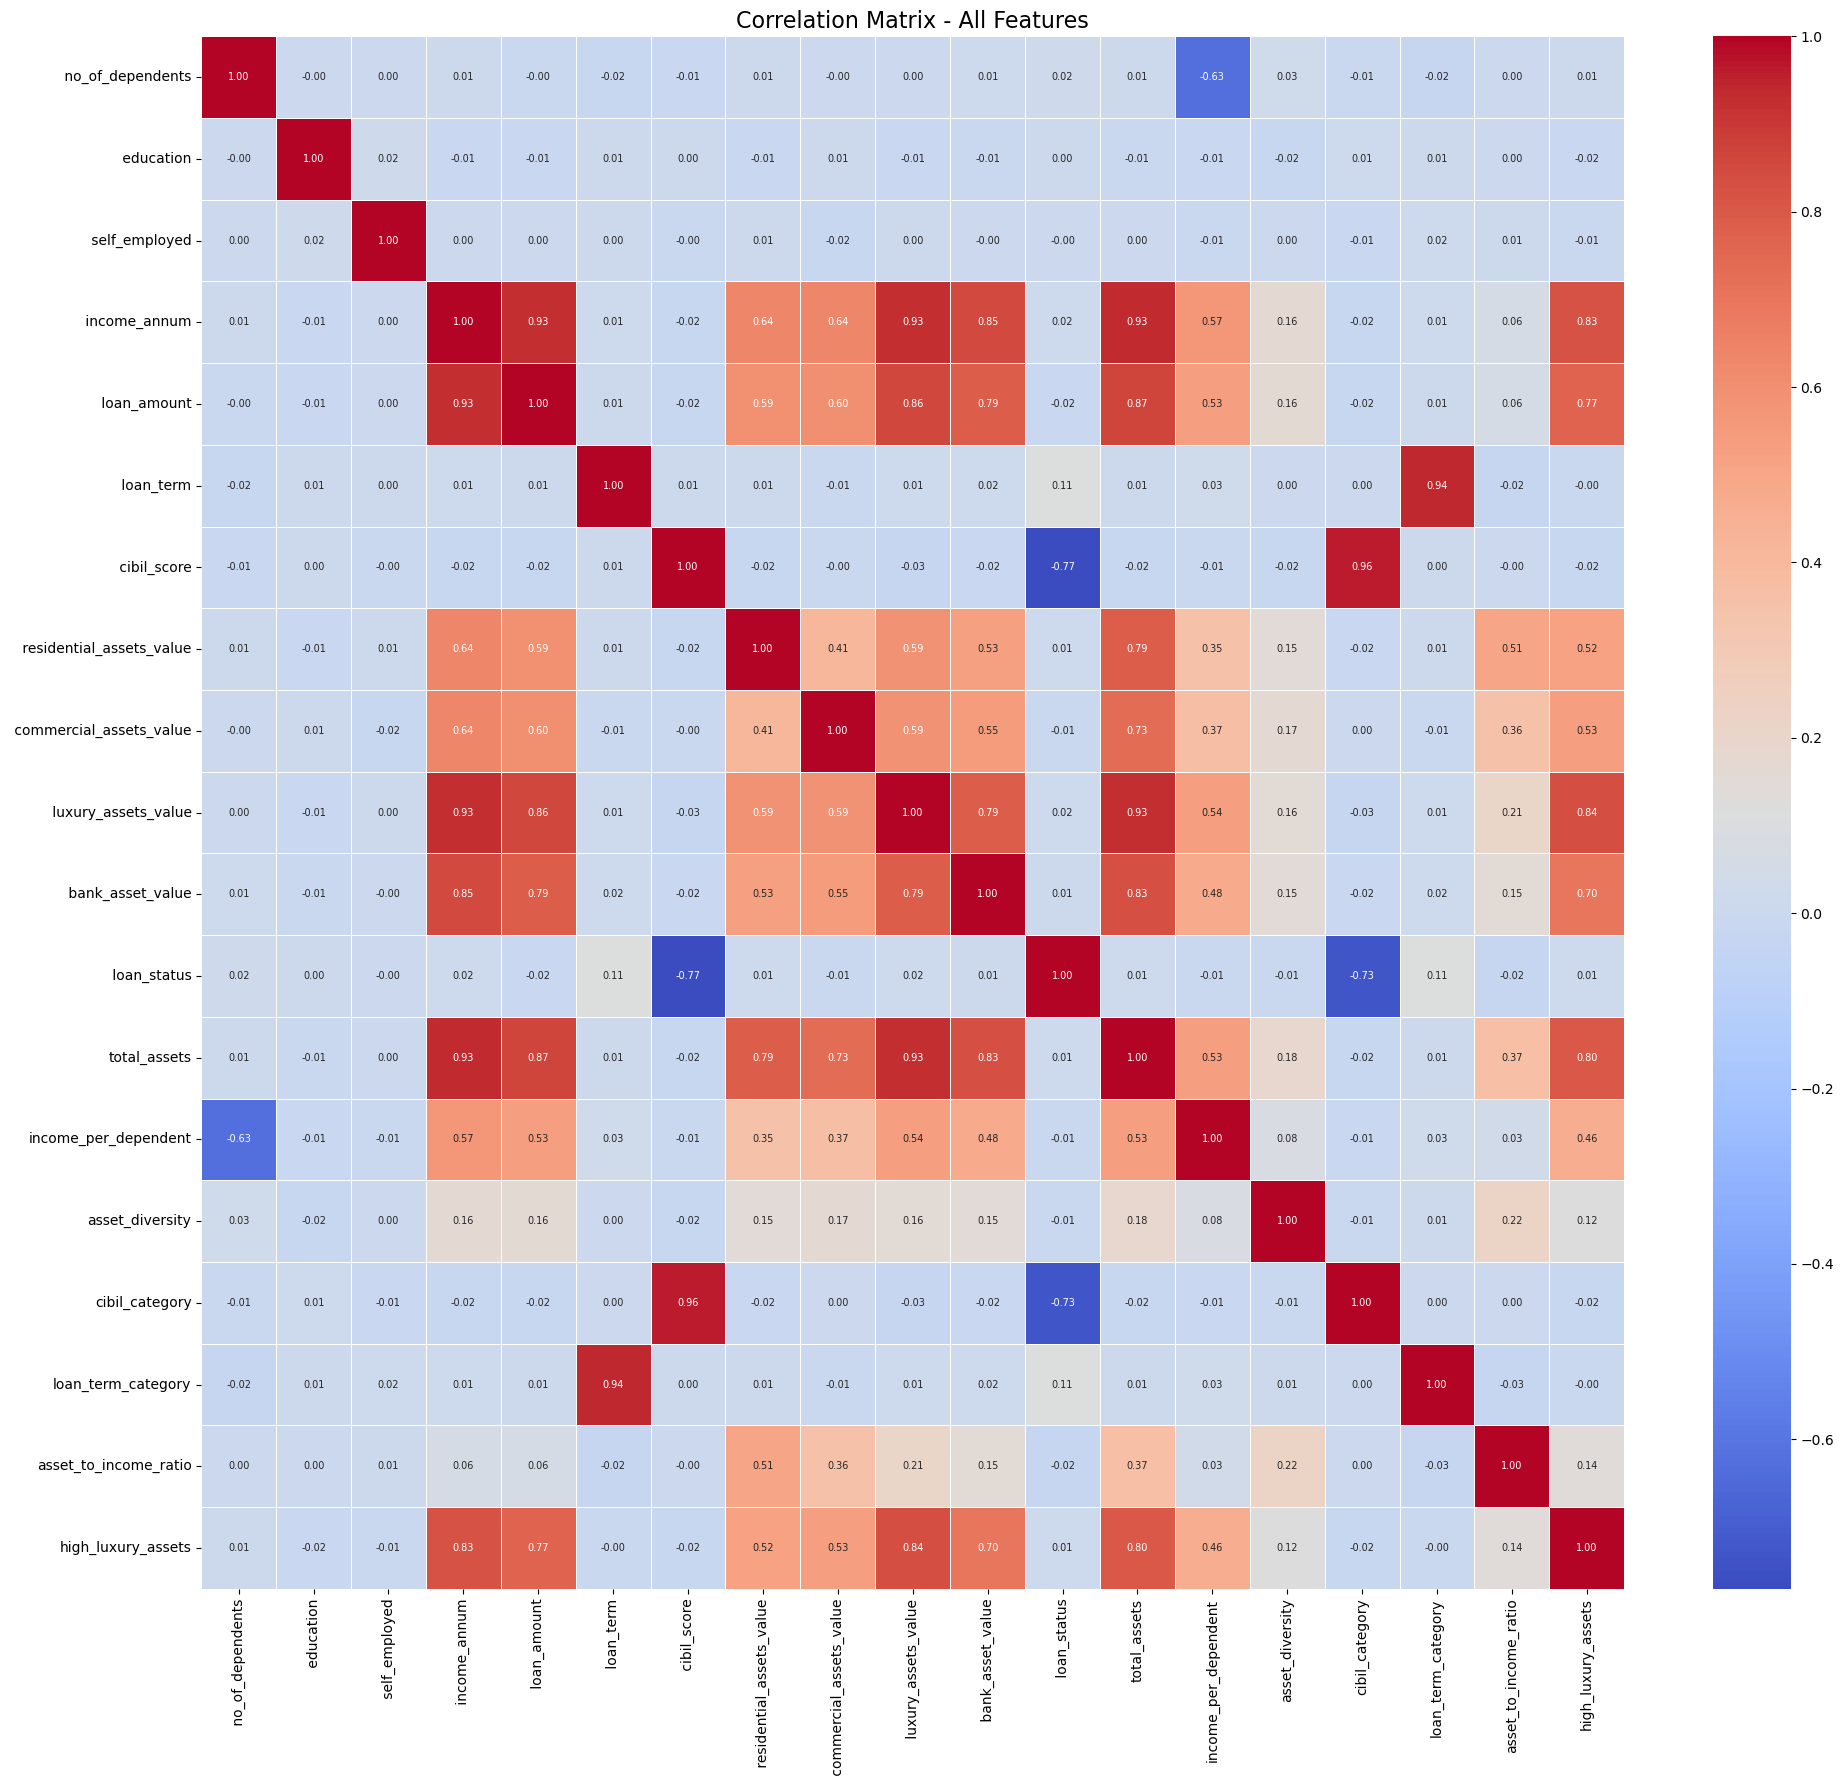

In [62]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            linewidths=0.5, fmt='.2f', annot_kws={'size': 7})
plt.title('Correlation Matrix - All Features', fontsize=16)
plt.tight_layout()
plt.show()

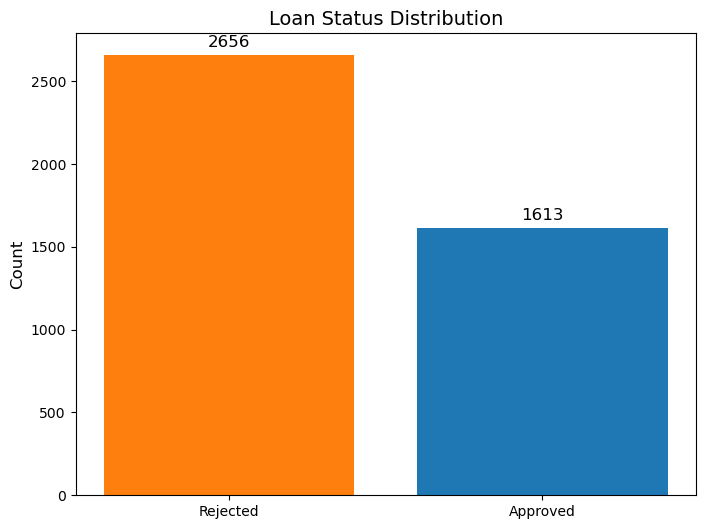

In [63]:
# Target distribution
plt.figure(figsize=(8, 6))
target_counts = df[' loan_status'].value_counts()
plt.bar(['Rejected', 'Approved'], target_counts.values, color=['#ff7f0e', '#1f77b4'])
plt.title('Loan Status Distribution', fontsize=14)
plt.ylabel('Count', fontsize=12)
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 50, str(v), ha='center', fontsize=12)
plt.show()


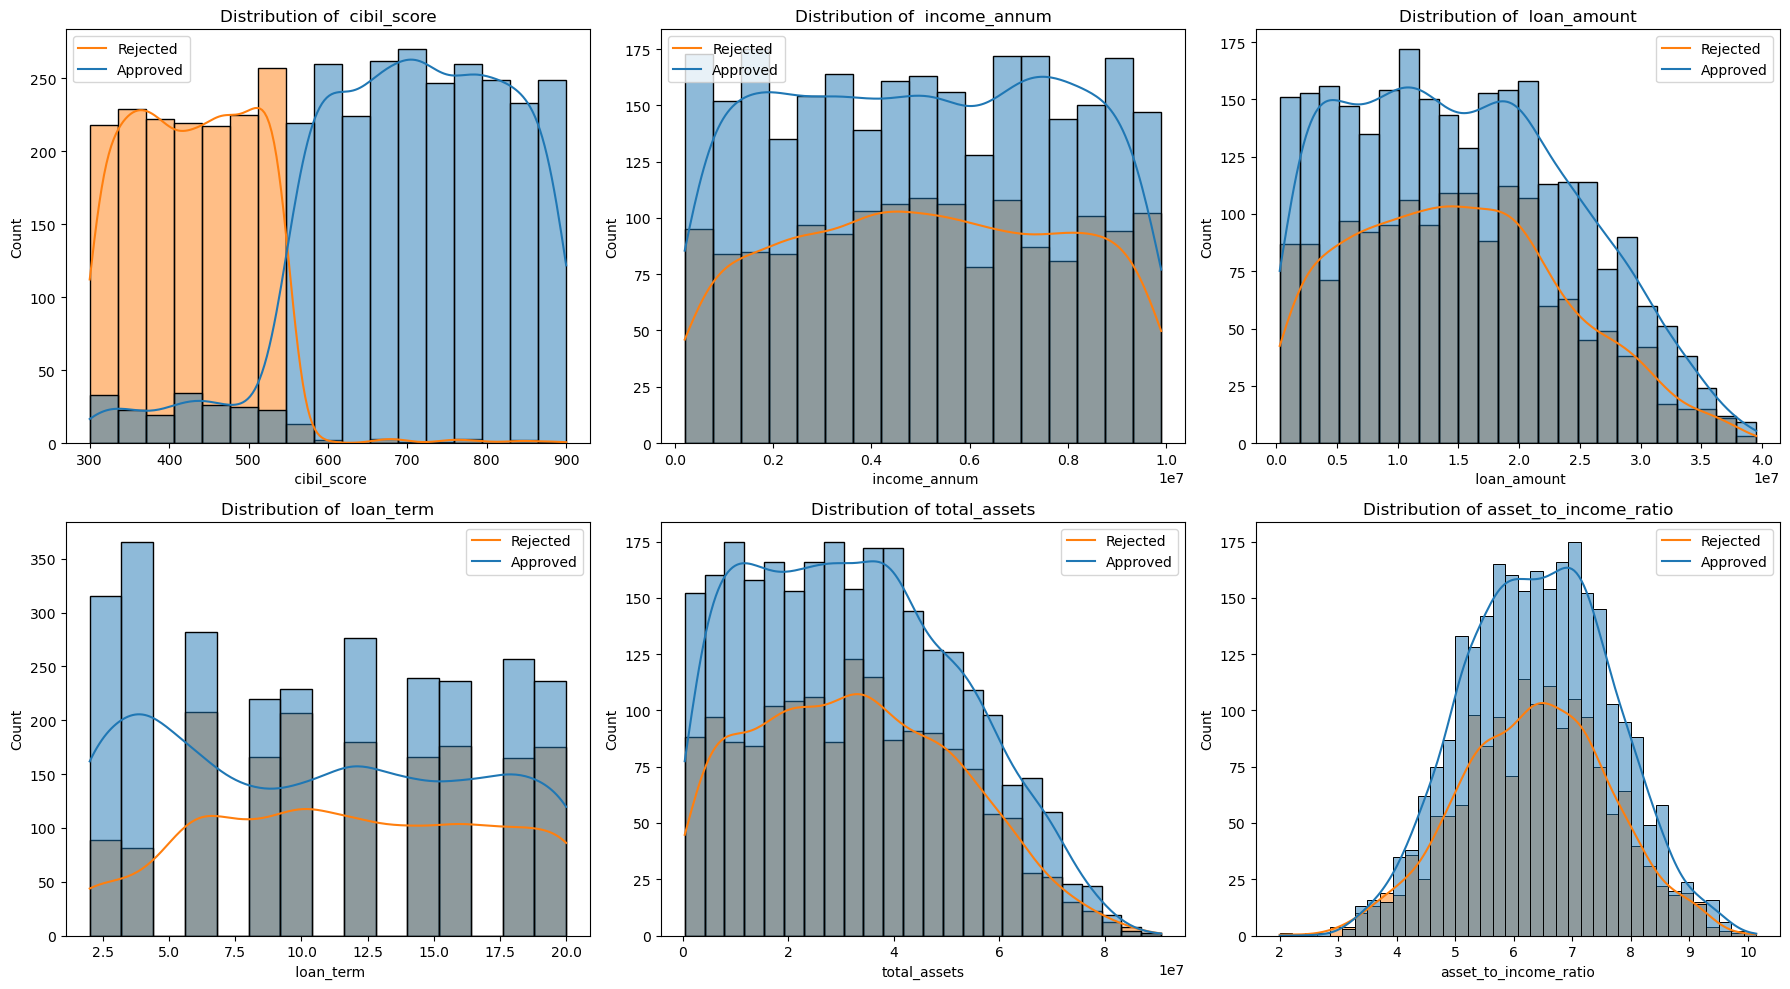

In [64]:
# Distribution of key features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

key_features = [' cibil_score', ' income_annum', ' loan_amount', 
                ' loan_term', 'total_assets', 'asset_to_income_ratio']

for idx, feature in enumerate(key_features):
    if feature in df.columns:
        sns.histplot(data=df, x=feature, hue=' loan_status', kde=True, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {feature}')
        axes[idx].legend(['Rejected', 'Approved'])

plt.tight_layout()
plt.show()

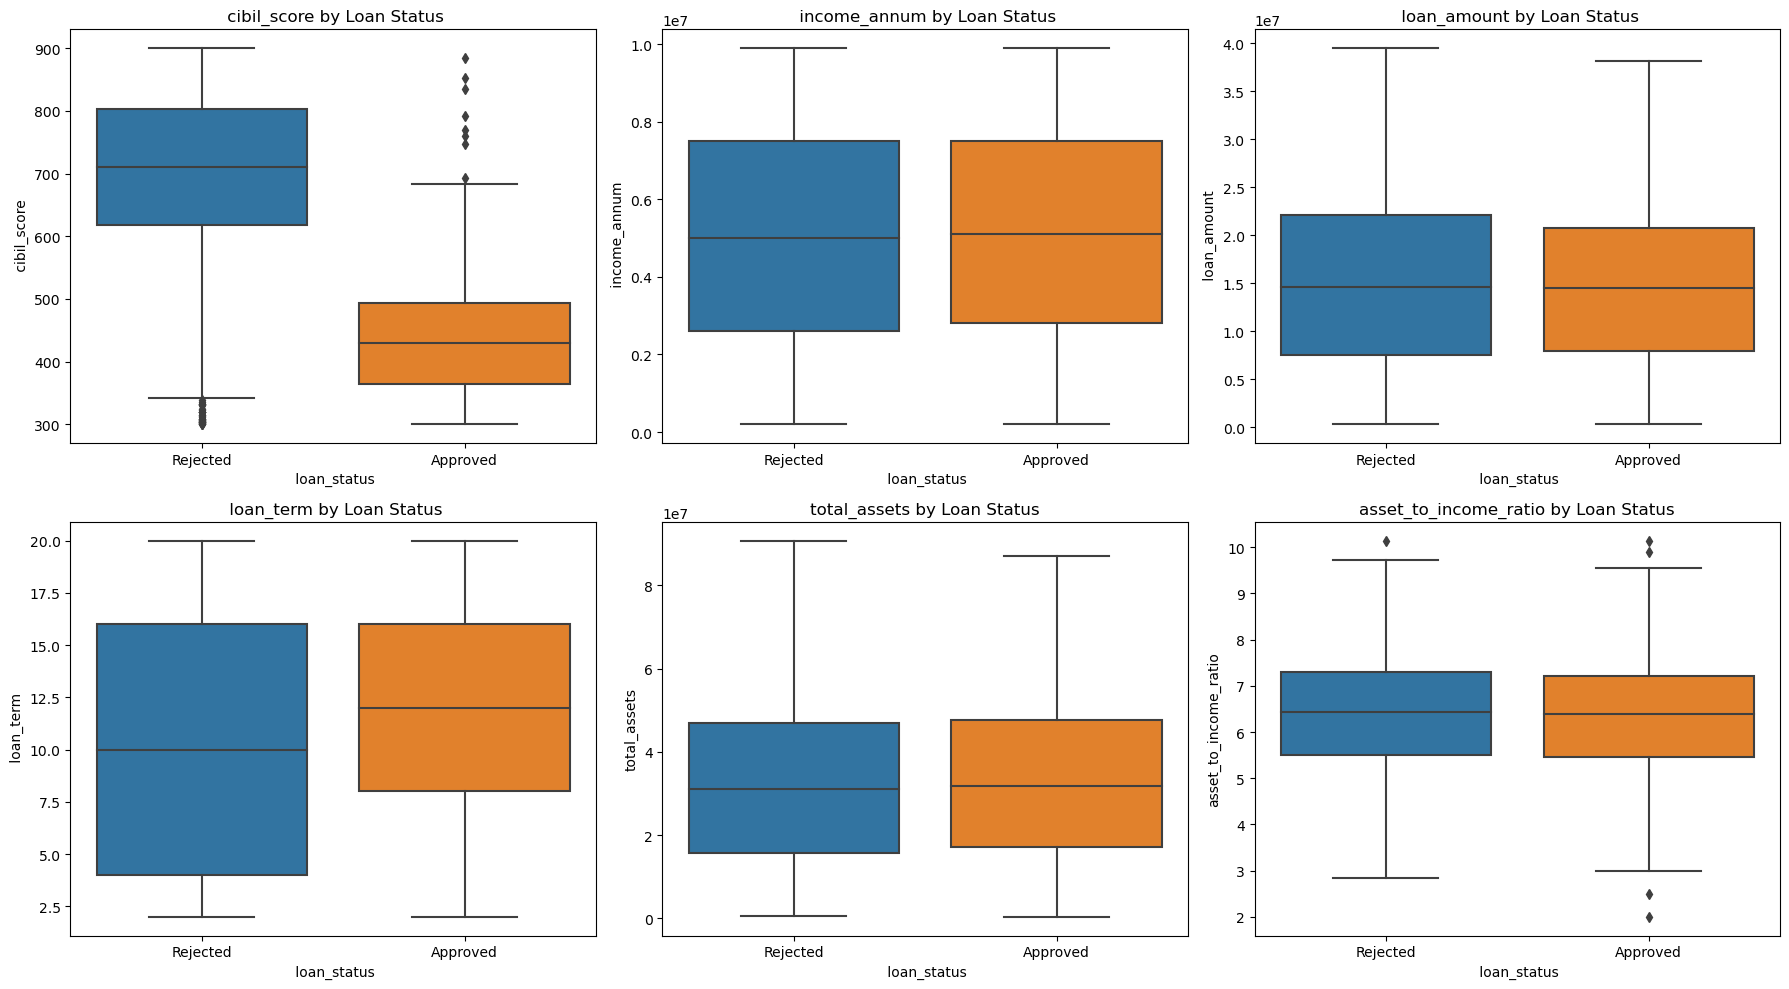

In [65]:
# Box plots by loan status
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    if feature in df.columns:
        sns.boxplot(data=df, x=' loan_status', y=feature, ax=axes[idx])
        axes[idx].set_xticklabels(['Rejected', 'Approved'])
        axes[idx].set_title(f'{feature} by Loan Status')

plt.tight_layout()
plt.show()

# TRAIN TEST SPLIT 

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop([' loan_status'], axis=1)
y = df[' loan_status']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures used for modeling:")
for i, col in enumerate(X.columns, 1):
    print(f"  {i}. {col}")

print(f"\nTarget distribution:")
print(y.value_counts())
print(f"\nClass balance: {y.value_counts()[1] / y.value_counts()[0]:.2f}")


Features shape: (4269, 18)
Target shape: (4269,)

Features used for modeling:
  1.  no_of_dependents
  2.  education
  3.  self_employed
  4.  income_annum
  5.  loan_amount
  6.  loan_term
  7.  cibil_score
  8.  residential_assets_value
  9.  commercial_assets_value
  10.  luxury_assets_value
  11.  bank_asset_value
  12. total_assets
  13. income_per_dependent
  14. asset_diversity
  15. cibil_category
  16. loan_term_category
  17. asset_to_income_ratio
  18. high_luxury_assets

Target distribution:
0    2656
1    1613
Name:  loan_status, dtype: int64

Class balance: 0.61


In [67]:
# Split data with stratification and fixed random_state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y,
    random_state=42
)

print(f"\n✅ Data split complete!")
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")



✅ Data split complete!
Training set size: 3415 samples (80.0%)
Test set size: 854 samples (20.0%)


In [68]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Feature scaling complete!")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")


✅ Feature scaling complete!
Training set shape: (3415, 18)
Test set shape: (854, 18)


# MODEL

### 1. LOGISTIC REGRESSION

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, f1_score, roc_auc_score, roc_curve)

# Hyperparameter tuning
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

lr = LogisticRegression(random_state=42)

lr_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

print("\nStarting Logistic Regression hyperparameter tuning...")
lr_search.fit(X_train_scaled, y_train)

print("\n" + "="*60)
print("Best Logistic Regression Parameters:")
print("="*60)
print(lr_search.best_params_)
print(f"\nBest CV ROC-AUC Score: {lr_search.best_score_:.4f}")

# Get best model
lr_best = lr_search.best_estimator_


Starting Logistic Regression hyperparameter tuning...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



Best Logistic Regression Parameters:
{'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}

Best CV ROC-AUC Score: 0.9659


In [70]:
# Evaluate
y_pred_lr = lr_best.predict(X_test_scaled)
y_pred_proba_lr = lr_best.predict_proba(X_test_scaled)[:, 1]

accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print("\n" + "="*60)
print("LOGISTIC REGRESSION RESULTS")
print("="*60)
print(f"Accuracy:  {accuracy_lr:.4f}")
print(f"F1-Score:  {f1_lr:.4f}")
print(f"ROC-AUC:   {roc_auc_lr:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Rejected', 'Approved']))


LOGISTIC REGRESSION RESULTS
Accuracy:  0.9227
F1-Score:  0.8949
ROC-AUC:   0.9751

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.92      0.95      0.94       531
    Approved       0.92      0.87      0.89       323

    accuracy                           0.92       854
   macro avg       0.92      0.91      0.92       854
weighted avg       0.92      0.92      0.92       854



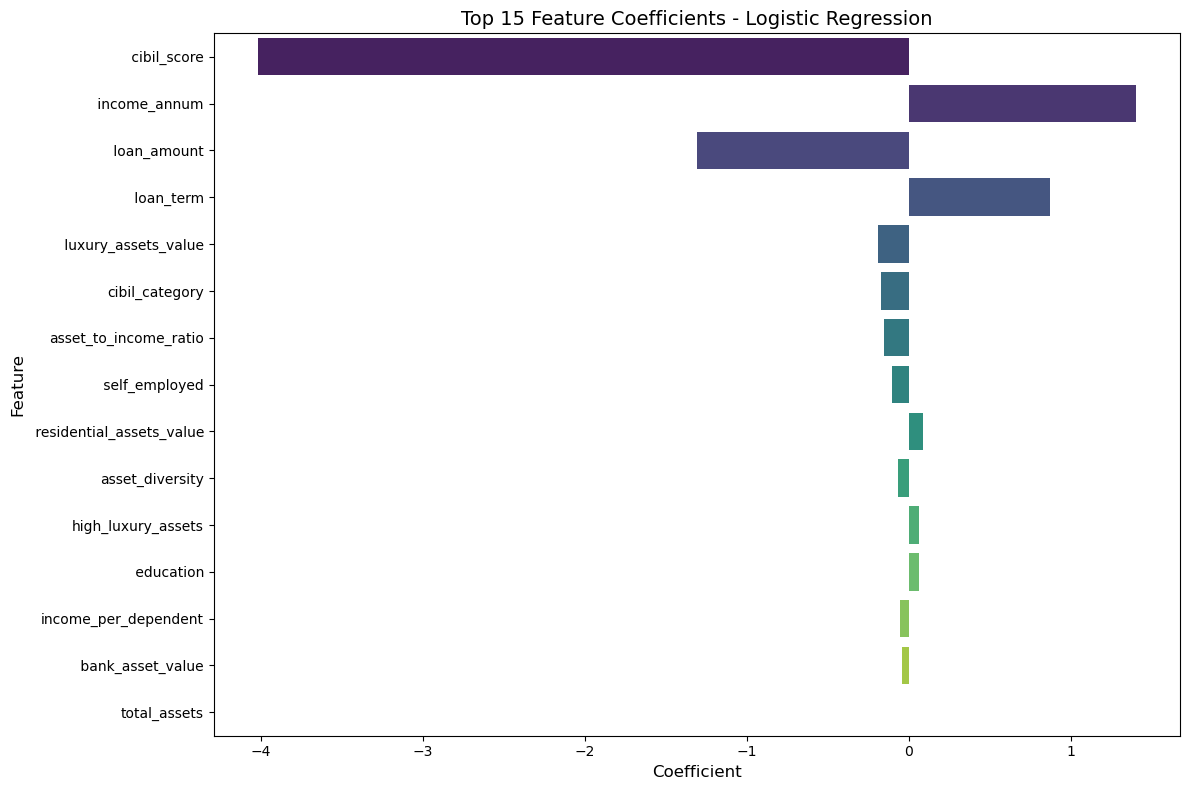

In [71]:
# Feature Coefficients
feature_coef_lr = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_best.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_coef_lr.head(15), x='coefficient', y='feature', palette='viridis')
plt.title('Top 15 Feature Coefficients - Logistic Regression', fontsize=14)
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

### 2.Random Forest


Starting Random Forest hyperparameter tuning...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best Random Forest Parameters:
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': None}

Best CV ROC-AUC Score: 0.9982

RANDOM FOREST RESULTS
Accuracy:  0.9789
F1-Score:  0.9720
ROC-AUC:   0.9985

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.98      0.98      0.98       531
    Approved       0.98      0.97      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



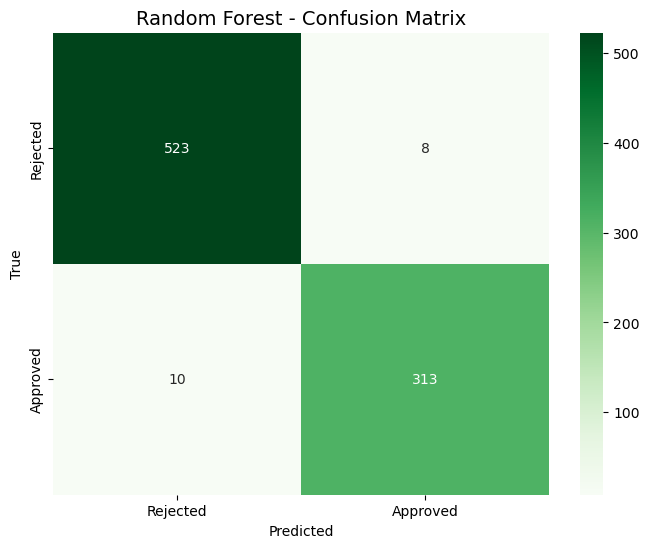

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

rfc = RandomForestClassifier(random_state=42)

rf_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_grid_rf,
    n_iter=30,
    cv=5,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

print("\nStarting Random Forest hyperparameter tuning...")
rf_search.fit(X_train_scaled, y_train)

print("\n" + "="*60)
print("Best Random Forest Parameters:")
print("="*60)
print(rf_search.best_params_)
print(f"\nBest CV ROC-AUC Score: {rf_search.best_score_:.4f}")

# Get best model
rf_best = rf_search.best_estimator_

# Evaluate
y_pred_rf = rf_best.predict(X_test_scaled)
y_pred_proba_rf = rf_best.predict_proba(X_test_scaled)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("\n" + "="*60)
print("RANDOM FOREST RESULTS")
print("="*60)
print(f"Accuracy:  {accuracy_rf:.4f}")
print(f"F1-Score:  {f1_rf:.4f}")
print(f"ROC-AUC:   {roc_auc_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Rejected', 'Approved']))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])
plt.title('Random Forest - Confusion Matrix', fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


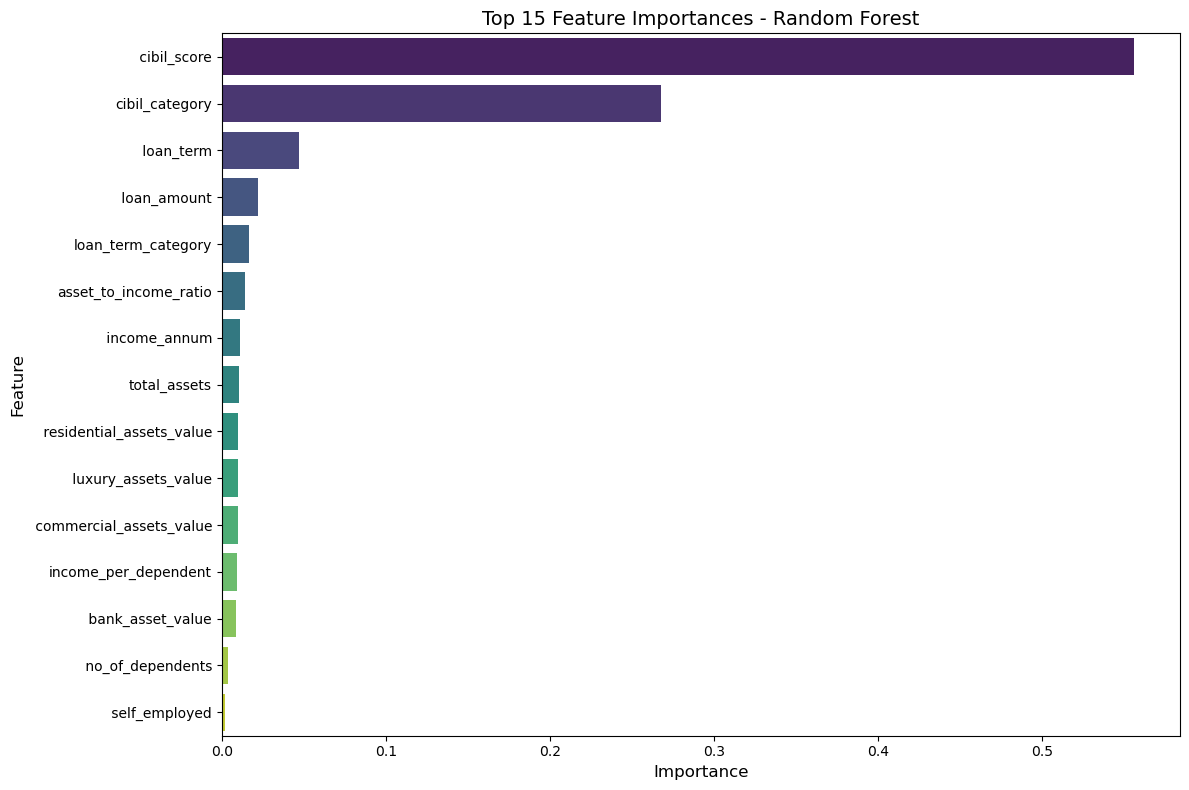


Top 10 Important Features (Random Forest):
                      feature  importance
6                 cibil_score    0.556134
14             cibil_category    0.267515
5                   loan_term    0.047326
4                 loan_amount    0.021841
15         loan_term_category    0.016297
16      asset_to_income_ratio    0.013875
3                income_annum    0.010889
11               total_assets    0.010335
7    residential_assets_value    0.009872
9         luxury_assets_value    0.009817


In [73]:
# Feature Importance
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_best.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_rf.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importances - Random Forest', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Top 10 Important Features (Random Forest):")
print("="*60)
print(feature_importance_rf.head(10))

### 3 XGBOOST CLASSIFIER

In [74]:
from xgboost import XGBClassifier

# Parameter grid
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 1.6]
}

xgb = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)

xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_params,
    n_iter=30,
    cv=5,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

print("\nStarting XGBoost hyperparameter tuning...")
xgb_search.fit(X_train_scaled, y_train)

print("\n" + "="*60)
print("Best XGBoost Parameters:")
print("="*60)
print(xgb_search.best_params_)
print(f"\nBest CV ROC-AUC Score: {xgb_search.best_score_:.4f}")

# Get best model
xgb_best = xgb_search.best_estimator_

# Evaluate
y_pred_xgb = xgb_best.predict(X_test_scaled)
y_pred_proba_xgb = xgb_best.predict_proba(X_test_scaled)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print("\n" + "="*60)
print("XGBOOST RESULTS")
print("="*60)
print(f"Accuracy:  {accuracy_xgb:.4f}")
print(f"F1-Score:  {f1_xgb:.4f}")
print(f"ROC-AUC:   {roc_auc_xgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['Rejected', 'Approved']))



Starting XGBoost hyperparameter tuning...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.9s
[CV] END class_weight=None, max_depth=20,

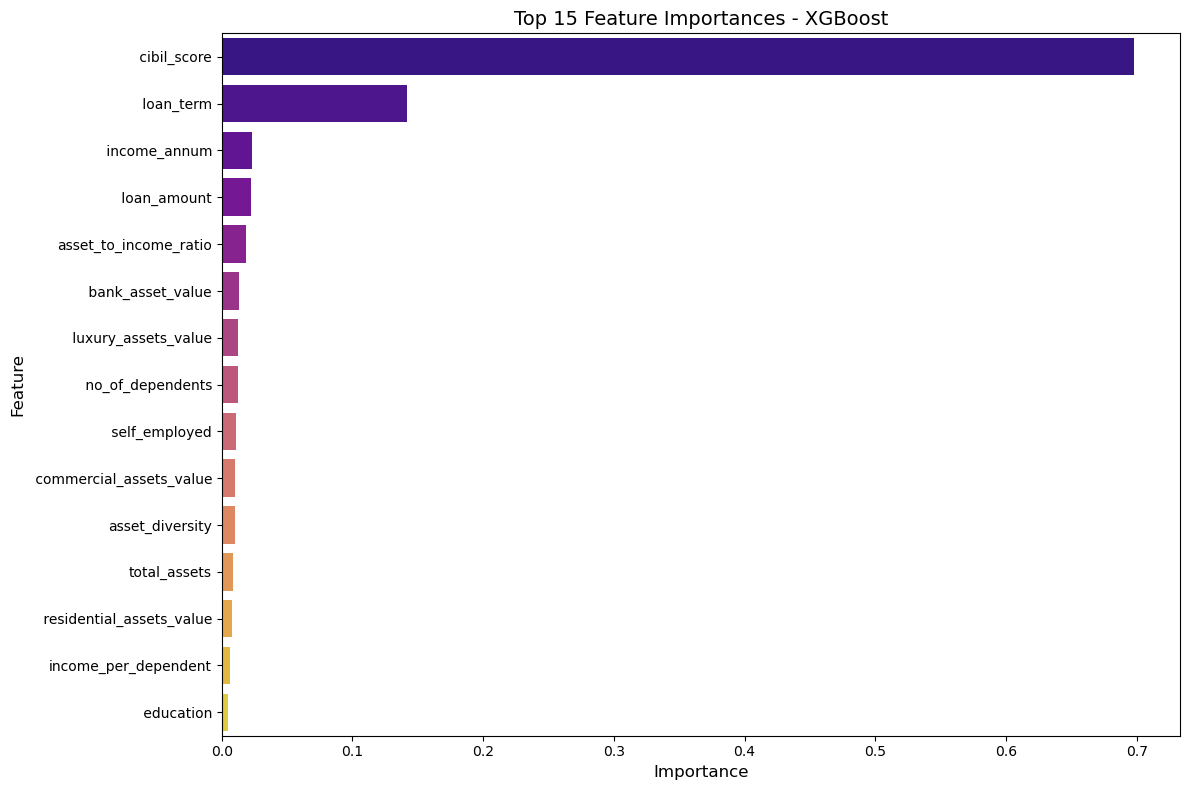


Top 10 Important Features (XGBoost):
                     feature  importance
6                cibil_score    0.698197
5                  loan_term    0.141361
3               income_annum    0.023248
4                loan_amount    0.022331
16     asset_to_income_ratio    0.018223
10          bank_asset_value    0.012918
9        luxury_assets_value    0.012295
0           no_of_dependents    0.012071
2              self_employed    0.011184
8    commercial_assets_value    0.010397


In [75]:
# Feature Importance
feature_importance_xgb = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_best.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_xgb.head(15), x='importance', y='feature', palette='plasma')
plt.title('Top 15 Feature Importances - XGBoost', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Top 10 Important Features (XGBoost):")
print("="*60)
print(feature_importance_xgb.head(10))

### 4.GRADIENT BOOSTING CLASSIFIER

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

# Parameter grid
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

gbc = GradientBoostingClassifier(random_state=42)

gb_search = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=gb_params,
    n_iter=30,
    cv=5,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

print("\nStarting Gradient Boosting hyperparameter tuning...")
gb_search.fit(X_train_scaled, y_train)

print("\n" + "="*60)
print("Best Gradient Boosting Parameters:")
print("="*60)
print(gb_search.best_params_)
print(f"\nBest CV ROC-AUC Score: {gb_search.best_score_:.4f}")

# Get best model
gb_best = gb_search.best_estimator_

# Evaluate
y_pred_gb = gb_best.predict(X_test_scaled)
y_pred_proba_gb = gb_best.predict_proba(X_test_scaled)[:, 1]

accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)

print("\n" + "="*60)
print("GRADIENT BOOSTING RESULTS")
print("="*60)
print(f"Accuracy:  {accuracy_gb:.4f}")
print(f"F1-Score:  {f1_gb:.4f}")
print(f"ROC-AUC:   {roc_auc_gb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb, target_names=['Rejected', 'Approved']))



Starting Gradient Boosting hyperparameter tuning...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best Gradient Boosting Parameters:
{'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.05}

Best CV ROC-AUC Score: 0.9985

GRADIENT BOOSTING RESULTS
Accuracy:  0.9801
F1-Score:  0.9734
ROC-AUC:   0.9989

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.98      0.99      0.98       531
    Approved       0.98      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



# HYPERPARAMETER TUNING & MODEL SELECTION

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, f1_score, roc_auc_score, roc_curve)

# Store all results
results = {}

# ============================================
# MODEL 1: LOGISTIC REGRESSION
# ============================================
print("\n" + "="*60)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*60)

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr_search = RandomizedSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid_lr, n_iter=20, cv=5, scoring='roc_auc',
    verbose=1, n_jobs=-1, random_state=42
)

lr_search.fit(X_train_scaled, y_train)
lr_best = lr_search.best_estimator_

y_pred_lr = lr_best.predict(X_test_scaled)
y_pred_proba_lr = lr_best.predict_proba(X_test_scaled)[:, 1]

results['Logistic Regression'] = {
    'model': lr_best,
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'f1_score': f1_score(y_test, y_pred_lr),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_lr),
    'predictions': y_pred_lr,
    'probabilities': y_pred_proba_lr
}

print(f"Best Params: {lr_search.best_params_}")
print(f"Accuracy: {results['Logistic Regression']['accuracy']:.4f}")
print(f"F1-Score: {results['Logistic Regression']['f1_score']:.4f}")
print(f"ROC-AUC: {results['Logistic Regression']['roc_auc']:.4f}")

# ============================================
# MODEL 2: RANDOM FOREST
# ============================================
print("\n" + "="*60)
print("MODEL 2: RANDOM FOREST")
print("="*60)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf, n_iter=30, cv=5, scoring='roc_auc',
    verbose=1, n_jobs=-1, random_state=42
)

rf_search.fit(X_train_scaled, y_train)
rf_best = rf_search.best_estimator_

y_pred_rf = rf_best.predict(X_test_scaled)
y_pred_proba_rf = rf_best.predict_proba(X_test_scaled)[:, 1]

results['Random Forest'] = {
    'model': rf_best,
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'f1_score': f1_score(y_test, y_pred_rf),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_rf),
    'predictions': y_pred_rf,
    'probabilities': y_pred_proba_rf,
    'feature_importance': rf_best.feature_importances_
}

print(f"Best Params: {rf_search.best_params_}")
print(f"Accuracy: {results['Random Forest']['accuracy']:.4f}")
print(f"F1-Score: {results['Random Forest']['f1_score']:.4f}")
print(f"ROC-AUC: {results['Random Forest']['roc_auc']:.4f}")

# ============================================
# MODEL 3: XGBOOST
# ============================================
print("\n" + "="*60)
print("MODEL 3: XGBOOST")
print("="*60)

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_search = RandomizedSearchCV(
    XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False),
    param_grid_xgb, n_iter=30, cv=5, scoring='roc_auc',
    verbose=1, n_jobs=-1, random_state=42
)

xgb_search.fit(X_train_scaled, y_train)
xgb_best = xgb_search.best_estimator_

y_pred_xgb = xgb_best.predict(X_test_scaled)
y_pred_proba_xgb = xgb_best.predict_proba(X_test_scaled)[:, 1]

results['XGBoost'] = {
    'model': xgb_best,
    'accuracy': accuracy_score(y_test, y_pred_xgb),
    'f1_score': f1_score(y_test, y_pred_xgb),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_xgb),
    'predictions': y_pred_xgb,
    'probabilities': y_pred_proba_xgb,
    'feature_importance': xgb_best.feature_importances_
}

print(f"Best Params: {xgb_search.best_params_}")
print(f"Accuracy: {results['XGBoost']['accuracy']:.4f}")
print(f"F1-Score: {results['XGBoost']['f1_score']:.4f}")
print(f"ROC-AUC: {results['XGBoost']['roc_auc']:.4f}")

# ============================================
# MODEL 4: GRADIENT BOOSTING
# ============================================
print("\n" + "="*60)
print("MODEL 4: GRADIENT BOOSTING")
print("="*60)

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 0.9, 1.0]
}

gb_search = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid_gb, n_iter=30, cv=5, scoring='roc_auc',
    verbose=1, n_jobs=-1, random_state=42
)

gb_search.fit(X_train_scaled, y_train)
gb_best = gb_search.best_estimator_

y_pred_gb = gb_best.predict(X_test_scaled)
y_pred_proba_gb = gb_best.predict_proba(X_test_scaled)[:, 1]

results['Gradient Boosting'] = {
    'model': gb_best,
    'accuracy': accuracy_score(y_test, y_pred_gb),
    'f1_score': f1_score(y_test, y_pred_gb),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_gb),
    'predictions': y_pred_gb,
    'probabilities': y_pred_proba_gb,
    'feature_importance': gb_best.feature_importances_
}

print(f"Best Params: {gb_search.best_params_}")
print(f"Accuracy: {results['Gradient Boosting']['accuracy']:.4f}")
print(f"F1-Score: {results['Gradient Boosting']['f1_score']:.4f}")
print(f"ROC-AUC: {results['Gradient Boosting']['roc_auc']:.4f}")



MODEL 1: LOGISTIC REGRESSION
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1}
Accuracy: 0.9227
F1-Score: 0.8949
ROC-AUC: 0.9751

MODEL 2: RANDOM FOREST
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
Accuracy: 0.9766
F1-Score: 0.9690
ROC-AUC: 0.9985

MODEL 3: XGBOOST
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Accuracy: 0.9824
F1-Score: 0.9765
ROC-AUC: 0.9991

MODEL 4: GRADIENT BOOSTING
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Params: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 10, 'max_depth': 7, 'learning_rate': 0.01}
Accuracy: 0.9836
F1-Score: 0.9782
ROC-AUC: 0.9990


# MODEL COMPARISON


               Model  Accuracy  F1-Score  ROC-AUC
Logistic Regression  0.922717  0.894904 0.975098
      Random Forest  0.976581  0.969040 0.998467
            XGBoost  0.982436  0.976526 0.999131
  Gradient Boosting  0.983607  0.978193 0.999038


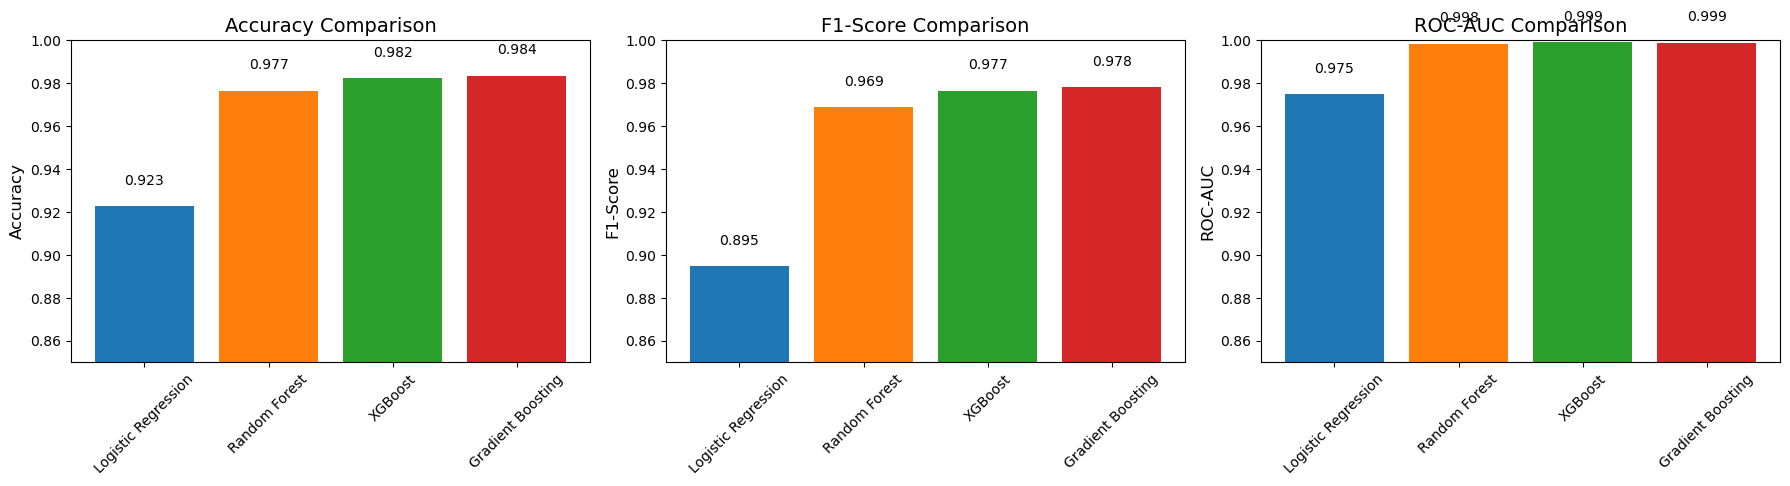

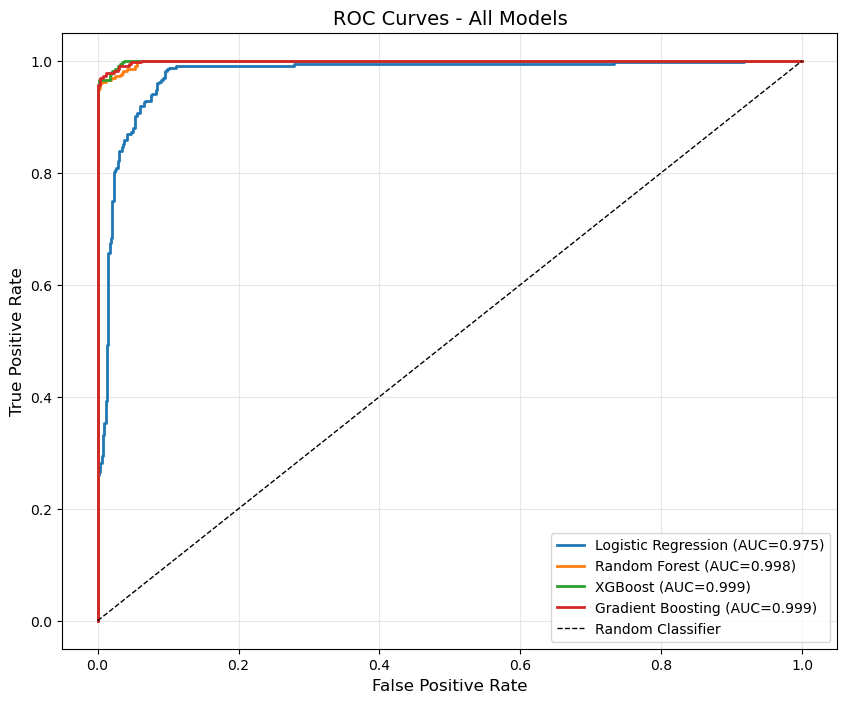

In [78]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] for m in results.keys()],
    'ROC-AUC': [results[m]['roc_auc'] for m in results.keys()]
})

print("\n", comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
metrics = ['Accuracy', 'F1-Score', 'ROC-AUC']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for idx, metric in enumerate(metrics):
    axes[idx].bar(comparison_df['Model'], comparison_df[metric], color=colors)
    axes[idx].set_title(f'{metric} Comparison', fontsize=14)
    axes[idx].set_ylabel(metric, fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].set_ylim([0.85, 1.0])
    
    for i, v in enumerate(comparison_df[metric]):
        axes[idx].text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Combined ROC Curves
plt.figure(figsize=(10, 8))
for model_name in results.keys():
    fpr, tpr, _ = roc_curve(y_test, results[model_name]['probabilities'])
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={results[model_name]['roc_auc']:.3f})", linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

In [79]:
# Select best model
best_model_name = comparison_df.loc[comparison_df['ROC-AUC'].idxmax(), 'Model']
best_model = results[best_model_name]['model']

print("\n" + "="*60)
print("BEST MODEL SELECTION")
print("="*60)
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"   F1-Score: {results[best_model_name]['f1_score']:.4f}")
print(f"   ROC-AUC: {results[best_model_name]['roc_auc']:.4f}")

# Detailed report for best model
print("\n" + "="*60)
print(f"DETAILED CLASSIFICATION REPORT - {best_model_name}")
print("="*60)
print(classification_report(y_test, results[best_model_name]['predictions'], 
                          target_names=['Rejected', 'Approved']))



BEST MODEL SELECTION

🏆 Best Model: XGBoost
   Accuracy: 0.9824
   F1-Score: 0.9765
   ROC-AUC: 0.9991

DETAILED CLASSIFICATION REPORT - XGBoost
              precision    recall  f1-score   support

    Rejected       0.98      0.99      0.99       531
    Approved       0.99      0.97      0.98       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, scale_pos_weight=1, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, scale_pos_weight=1, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=300, scale_pos_weight=1, subsample=0.9; total time=   2.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=100, scale_pos_weight=1.6, subsample=0.8; tot

# GLOBAL EXPLAINABILITY

### 1.PDP


Generating PDPs for top 6 features:
  1.  cibil_score
  2.  loan_term
  3.  income_annum
  4.  loan_amount
  5.  luxury_assets_value
  6. total_assets


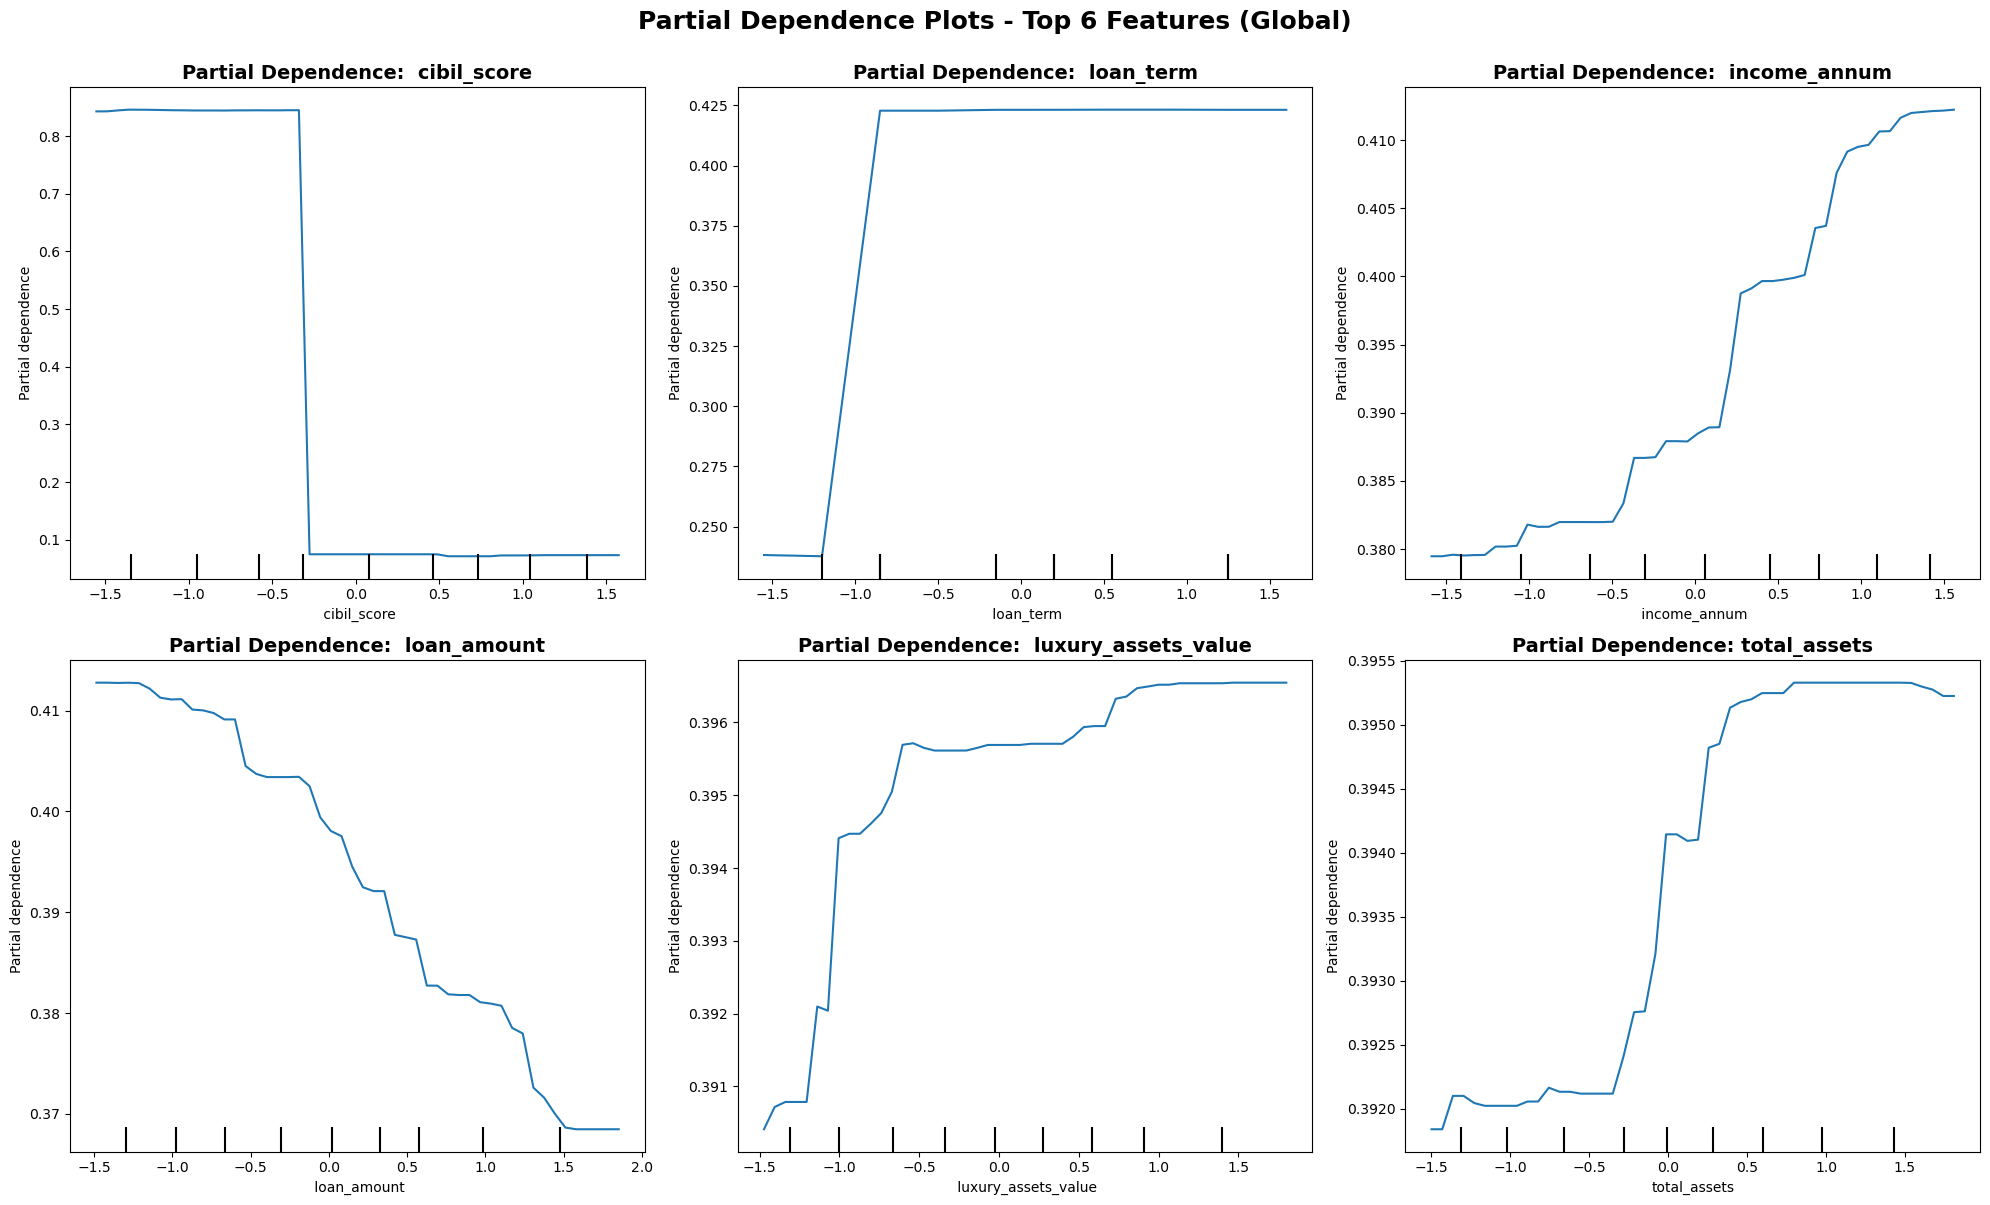

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
from sklearn.tree import plot_tree
# Get top 6 important features
if 'feature_importance' in results[best_model_name]:
    top_features = pd.DataFrame({
        'feature': X.columns,
        'importance': results[best_model_name]['feature_importance']
    }).sort_values('importance', ascending=False).head(6)['feature'].tolist()
else:
    # Use correlation as fallback
    top_features = df.corr()[' loan_status'].abs().sort_values(ascending=False)[1:7].index.tolist()

top_features_indices = [list(X.columns).index(f) for f in top_features]

print(f"\nGenerating PDPs for top 6 features:")
for i, f in enumerate(top_features, 1):
    print(f"  {i}. {f}")

# Create individual PDP plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, (feature_name, feature_idx) in enumerate(zip(top_features, top_features_indices)):
    display = PartialDependenceDisplay.from_estimator(
        best_model,
        X_test_scaled,
        [feature_idx],
        feature_names=X.columns,
        ax=axes[idx],
        kind='average',
        grid_resolution=50
    )
    axes[idx].set_title(f'Partial Dependence: {feature_name}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Feature Value (Scaled)', fontsize=11)
    axes[idx].set_ylabel('Partial Dependence', fontsize=11)
    axes[idx].grid(alpha=0.3)

plt.suptitle('Partial Dependence Plots - Top 6 Features (Global)', fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### 2.FEATURE INTERACTION STRENGTH


Calculating pairwise interactions...


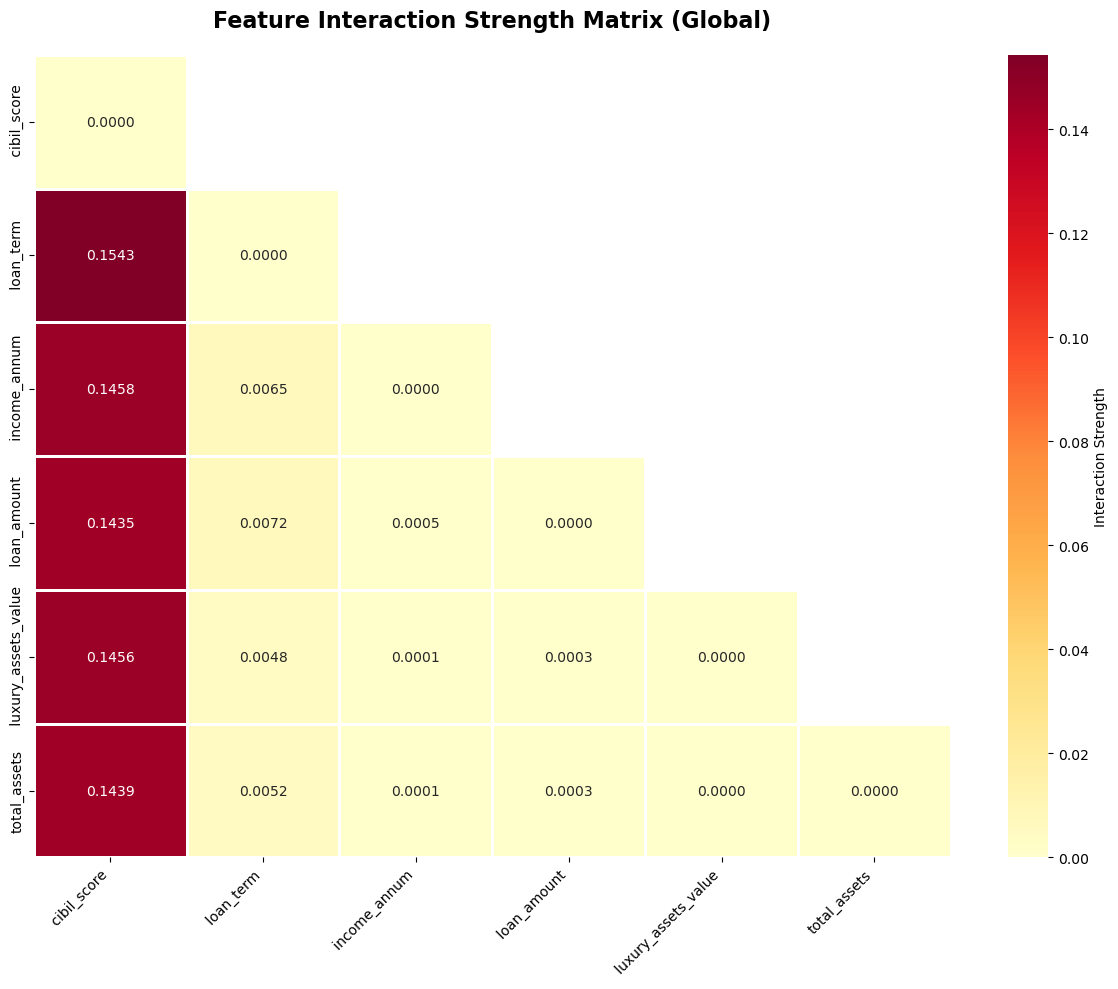


📊 Top 5 Feature Interactions:
   Feature 1            Feature 2  Strength
 cibil_score            loan_term  0.154283
 cibil_score         income_annum  0.145790
 cibil_score  luxury_assets_value  0.145584
 cibil_score         total_assets  0.143852
 cibil_score          loan_amount  0.143481
 Interaction analysis complete


In [82]:
# Calculate interaction strength
interaction_matrix = np.zeros((len(top_features), len(top_features)))

print(f"\nCalculating pairwise interactions...")

for i, feat1 in enumerate(top_features):
    for j, feat2 in enumerate(top_features):
        if i < j:
            idx1 = list(X.columns).index(feat1)
            idx2 = list(X.columns).index(feat2)
            
            pd_2d = partial_dependence(
                best_model, X_test_scaled, [(idx1, idx2)],
                grid_resolution=20, kind='average'
            )
            
            interaction_strength = np.var(pd_2d['average'][0])
            interaction_matrix[i, j] = interaction_strength
            interaction_matrix[j, i] = interaction_strength

# Visualize interaction matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(interaction_matrix, dtype=bool), k=1)
sns.heatmap(interaction_matrix, annot=True, fmt='.4f', cmap='YlOrRd',
            xticklabels=top_features, yticklabels=top_features,
            cbar_kws={'label': 'Interaction Strength'},
            mask=mask, linewidths=1, linecolor='white')
plt.title('Feature Interaction Strength Matrix (Global)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top interactions
interaction_pairs = []
for i in range(len(top_features)):
    for j in range(i+1, len(top_features)):
        interaction_pairs.append({
            'Feature 1': top_features[i],
            'Feature 2': top_features[j],
            'Strength': interaction_matrix[i, j]
        })

interaction_df = pd.DataFrame(interaction_pairs).sort_values('Strength', ascending=False)
print("\n📊 Top 5 Feature Interactions:")
print(interaction_df.head(5).to_string(index=False))

print(" Interaction analysis complete")

# Local Explainbility

### 1.LIME EXPLANATIONS


--------------------------------------------------------------------------------
SELECTING SAMPLE INSTANCES FOR EXPLANATION
--------------------------------------------------------------------------------

📋 Selected Sample Instances:
  Approved (Index: 3):
    Actual: Approved | Predicted: Approved | Probability: 0.9314
  Rejected (Index: 0):
    Actual: Rejected | Predicted: Rejected | Probability: 0.0682
  Borderline (Index: 552):
    Actual: Rejected | Predicted: Rejected | Probability: 0.4926
  High Confidence (Index: 3):
    Actual: Approved | Predicted: Approved | Probability: 0.9314

✅ Sample instances selected

--------------------------------------------------------------------------------
LIME (Local Interpretable Model-agnostic Explanations)
--------------------------------------------------------------------------------

LIME: Approved (Instance 3)

Prediction Probabilities:
  Rejected: 0.0686
  Approved: 0.9314

Top 10 Feature Contributions (for Approved):
  -0.85 <  cib

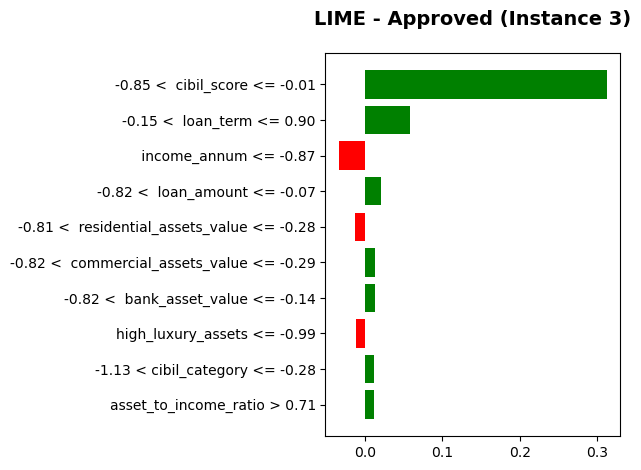


LIME: Rejected (Instance 0)

Prediction Probabilities:
  Rejected: 0.9318
  Approved: 0.0682

Top 10 Feature Contributions (for Approved):
   cibil_score > 0.86: -0.4441 → REJECT
   loan_amount > 0.71: -0.0681 → REJECT
  -0.15 <  loan_term <= 0.90: +0.0666 → APPROVE
   education <= -1.00: -0.0288 → REJECT
  cibil_category > 0.58: -0.0188 → REJECT
  -0.08 < loan_term_category <= 1.12: +0.0183 → APPROVE
  -0.29 <  commercial_assets_value <= 0.61: -0.0121 → REJECT
  -0.30 < income_per_dependent <= 0.21: -0.0092 → REJECT
   income_annum > 0.88: +0.0088 → APPROVE
  -0.99 < high_luxury_assets <= 1.01: +0.0071 → APPROVE


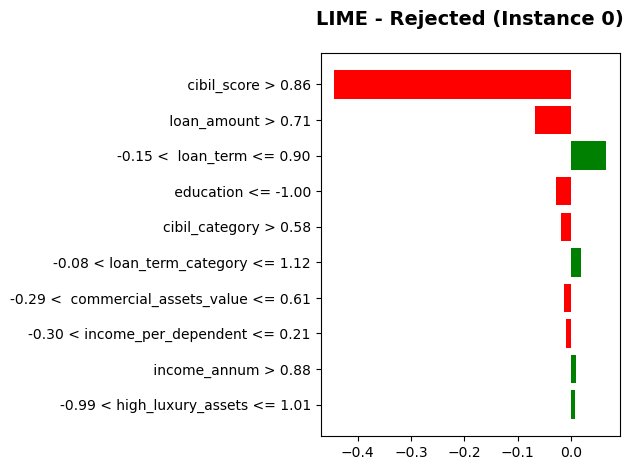


LIME: Borderline (Instance 552)

Prediction Probabilities:
  Rejected: 0.5074
  Approved: 0.4926

Top 10 Feature Contributions (for Approved):
   cibil_score <= -0.85: +0.5623 → APPROVE
   loan_term <= -0.85: -0.1469 → REJECT
   loan_amount <= -0.82: +0.0314 → APPROVE
   income_annum <= -0.87: -0.0192 → REJECT
   bank_asset_value <= -0.82: -0.0172 → REJECT
  total_assets <= -0.83: +0.0144 → APPROVE
  income_per_dependent <= -0.64: +0.0122 → APPROVE
   luxury_assets_value <= -0.85: -0.0108 → REJECT
  0.03 < asset_to_income_ratio <= 0.71: +0.0085 → APPROVE
  -1.00 <  education <= 1.00: -0.0069 → REJECT


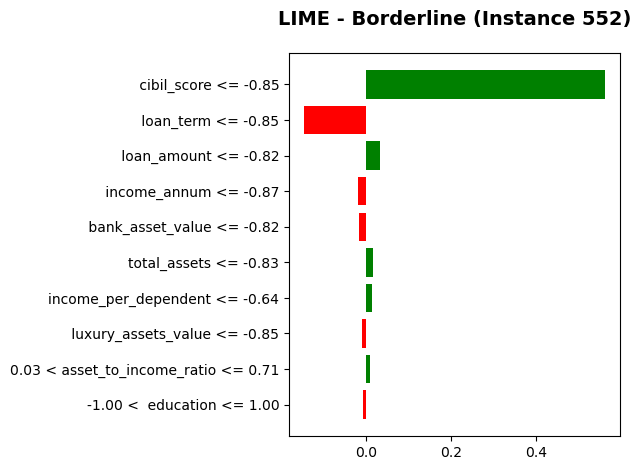


LIME: High Confidence (Instance 3)

Prediction Probabilities:
  Rejected: 0.0686
  Approved: 0.9314

Top 10 Feature Contributions (for Approved):
  -0.85 <  cibil_score <= -0.01: +0.3441 → APPROVE
  -0.15 <  loan_term <= 0.90: +0.0769 → APPROVE
  -0.83 < total_assets <= -0.06: -0.0344 → REJECT
  -0.82 <  loan_amount <= -0.07: +0.0282 → APPROVE
  -0.81 <  residential_assets_value <= -0.28: +0.0268 → APPROVE
  -0.82 <  commercial_assets_value <= -0.29: -0.0231 → REJECT
  high_luxury_assets <= -0.99: +0.0174 → APPROVE
  -1.00 <  education <= 1.00: -0.0072 → REJECT
  -1.28 < loan_term_category <= -0.08: -0.0059 → REJECT
  -1.00 <  self_employed <= 1.00: +0.0043 → APPROVE


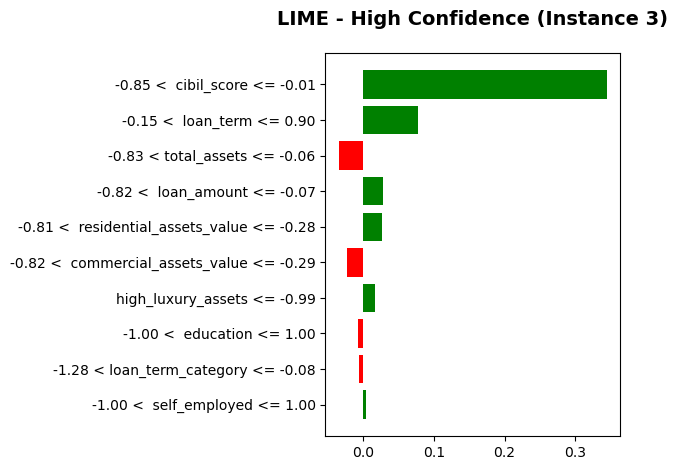


✅ LIME analysis complete


In [84]:
# ============================================
# SELECT SAMPLE INSTANCES FOR EXPLANATION
# ============================================
print("\n" + "-"*80)
print("SELECTING SAMPLE INSTANCES FOR EXPLANATION")
print("-"*80)

import numpy as np

# Get prediction probabilities
probs = results[best_model_name]['probabilities']

# Select diverse instances for comprehensive analysis

# 1. Correctly predicted APPROVED (True Positive)
approved_correct_idx = np.where((y_test == 1) & (results[best_model_name]['predictions'] == 1))[0]
sample_approved = approved_correct_idx[0] if len(approved_correct_idx) > 0 else 0

# 2. Correctly predicted REJECTED (True Negative)
rejected_correct_idx = np.where((y_test == 0) & (results[best_model_name]['predictions'] == 0))[0]
sample_rejected = rejected_correct_idx[0] if len(rejected_correct_idx) > 0 else 1

# 3. Borderline case (prediction probability close to 0.5)
sample_borderline = np.argmin(np.abs(probs - 0.5))

# 4. High confidence APPROVED
sample_high_conf = np.argmax(probs)

# Create samples dictionary
samples = {
    'Approved': sample_approved,
    'Rejected': sample_rejected,
    'Borderline': sample_borderline,
    'High Confidence': sample_high_conf
}

print("\n📋 Selected Sample Instances:")
for name, idx in samples.items():
    actual = 'Approved' if y_test.iloc[idx] == 1 else 'Rejected'
    predicted = 'Approved' if results[best_model_name]['predictions'][idx] == 1 else 'Rejected'
    prob = probs[idx]
    print(f"  {name} (Index: {idx}):")
    print(f"    Actual: {actual} | Predicted: {predicted} | Probability: {prob:.4f}")

print("\n✅ Sample instances selected")

# ============================================
# NOW YOUR LIME CODE STARTS HERE
# ============================================
print("\n" + "-"*80)
print("LIME (Local Interpretable Model-agnostic Explanations)")
print("-"*80)

import lime
import lime.lime_tabular

# Create LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled, feature_names=X.columns.tolist(),
    class_names=['Rejected', 'Approved'],
    mode='classification', random_state=42
)

lime_explanations = {}

for sample_name, sample_idx in samples.items():
    print(f"\n{'='*60}")
    print(f"LIME: {sample_name} (Instance {sample_idx})")
    print(f"{'='*60}")
    
    lime_exp = lime_explainer.explain_instance(
        X_test_scaled[sample_idx],
        best_model.predict_proba,
        num_features=10, top_labels=2
    )
    
    lime_explanations[sample_name] = lime_exp
    
    print(f"\nPrediction Probabilities:")
    print(f"  Rejected: {lime_exp.predict_proba[0]:.4f}")
    print(f"  Approved: {lime_exp.predict_proba[1]:.4f}")
    
    print(f"\nTop 10 Feature Contributions (for Approved):")
    for feature, weight in lime_exp.as_list(label=1):
        direction = "→ APPROVE" if weight > 0 else "→ REJECT"
        print(f"  {feature}: {weight:+.4f} {direction}")
    
    # Visualize
    fig = lime_exp.as_pyplot_figure(label=1)
    plt.title(f'LIME - {sample_name} (Instance {sample_idx})', 
              fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

print("\n✅ LIME analysis complete")

### 2.COUNTERFACTUAL EXPLANATIONS


Counterfactual: Rejected
Current: Rejected → Target: Approved

🔄 Top 5 Minimal Changes to Get Approved:

  1.  cibil_score:
     Current: 1.6901
     Required: -0.2899
     Change: -1.9800 (decrease)


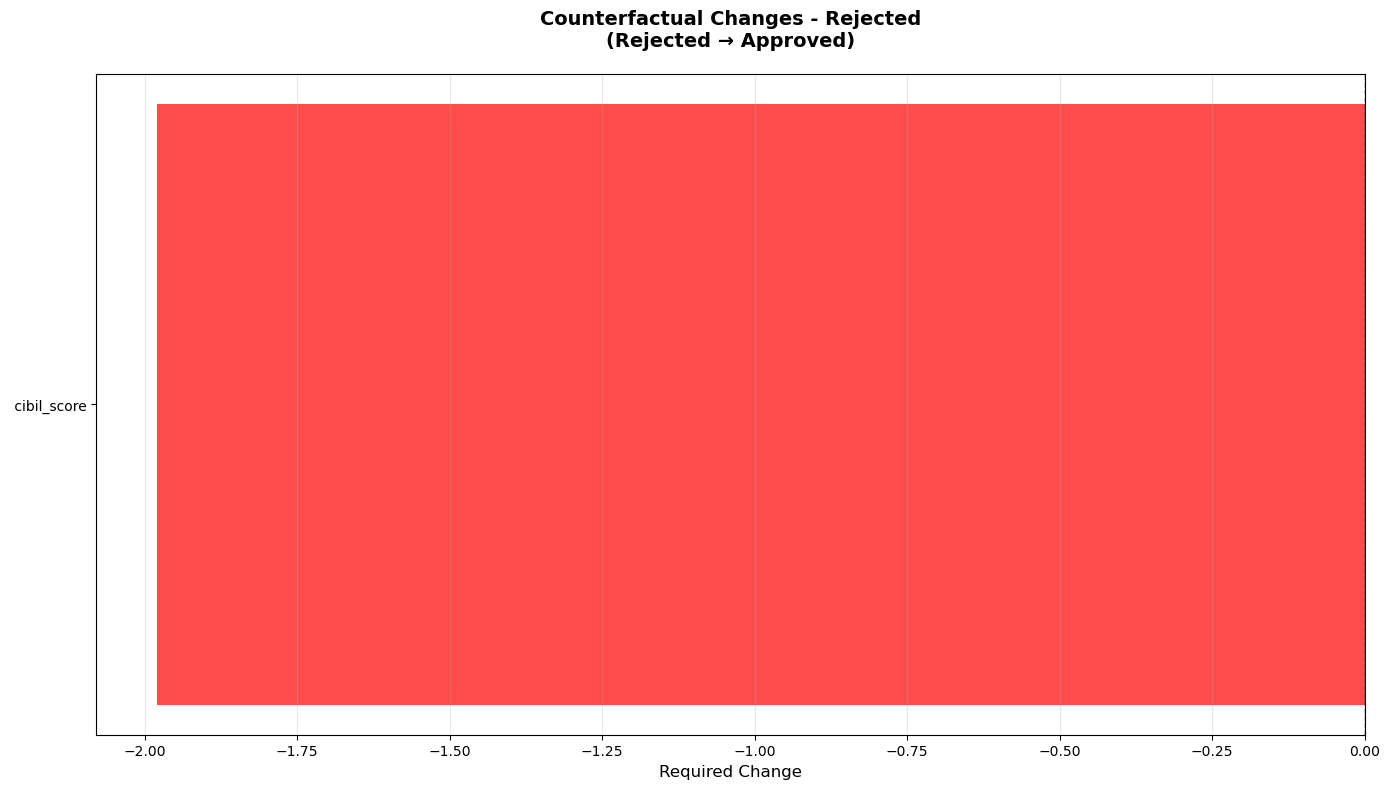


Counterfactual: Borderline
Current: Rejected → Target: Approved

🔄 Top 5 Minimal Changes to Get Approved:

  11. income_per_dependent:
     Current: -0.9333
     Required: -0.9433
     Change: -0.0100 (decrease)

  2.  loan_amount:
     Current: -1.2285
     Required: -1.2685
     Change: -0.0400 (decrease)

  5.  residential_assets_value:
     Current: -0.8714
     Required: -0.9414
     Change: -0.0700 (decrease)

  1.  income_annum:
     Current: -1.4082
     Required: -1.2582
     Change: +0.1500 (increase)

  4.  residential_assets_value:
     Current: -0.8714
     Required: -0.6814
     Change: +0.1900 (increase)


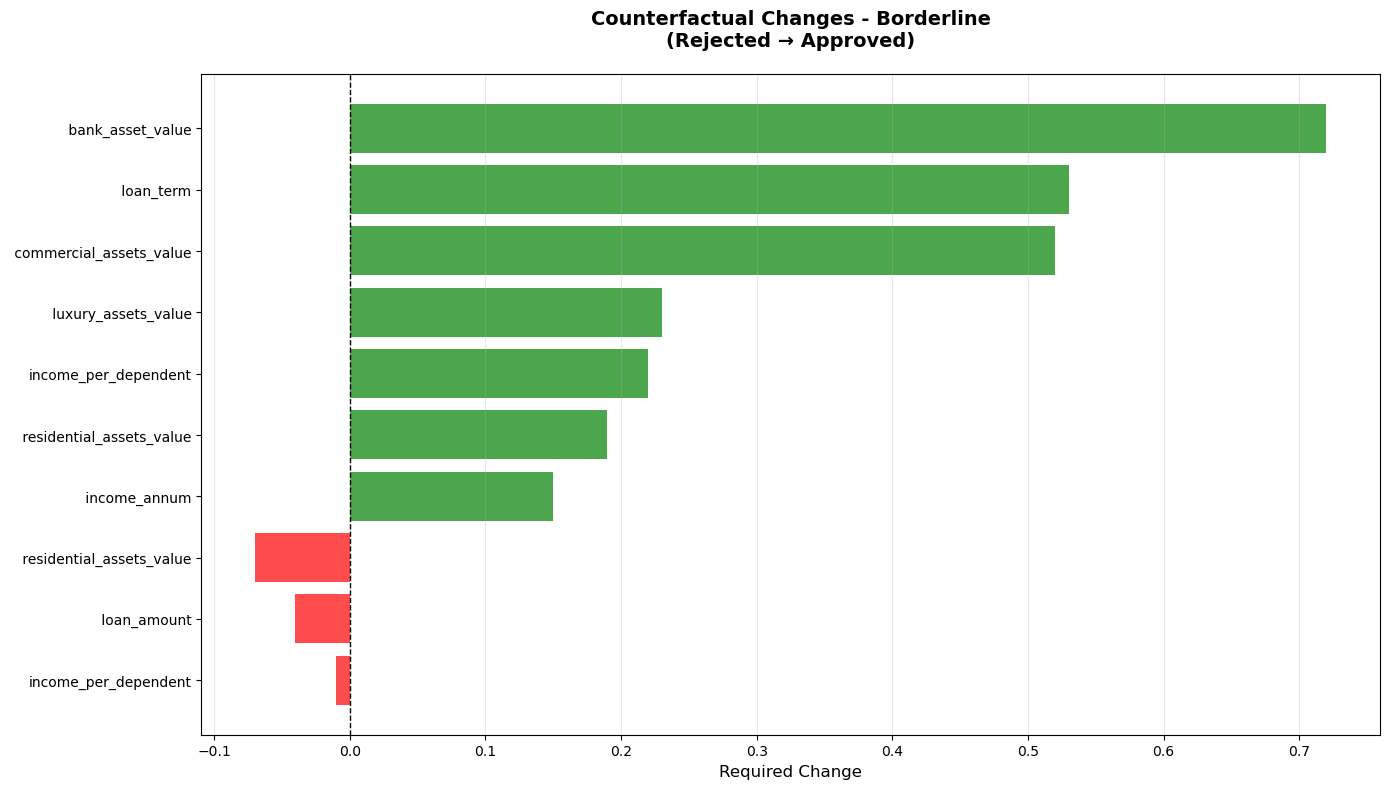


✅ Counterfactual analysis complete


In [85]:
def find_counterfactual(instance, target_class, model, max_iter=1000, step=0.01):
    """Find minimal changes to flip prediction"""
    feature_changes = []
    
    for feature_idx in range(len(instance)):
        # Try increasing
        modified = instance.copy()
        for _ in range(max_iter):
            modified[feature_idx] += step
            new_pred = model.predict_proba([modified])[0]
            
            if np.argmax(new_pred) == target_class:
                feature_changes.append({
                    'feature': X.columns[feature_idx],
                    'original': instance[feature_idx],
                    'new': modified[feature_idx],
                    'change': modified[feature_idx] - instance[feature_idx],
                    'direction': 'increase',
                    'probability': new_pred[target_class]
                })
                break
        
        # Try decreasing
        modified = instance.copy()
        for _ in range(max_iter):
            modified[feature_idx] -= step
            new_pred = model.predict_proba([modified])[0]
            
            if np.argmax(new_pred) == target_class:
                feature_changes.append({
                    'feature': X.columns[feature_idx],
                    'original': instance[feature_idx],
                    'new': modified[feature_idx],
                    'change': modified[feature_idx] - instance[feature_idx],
                    'direction': 'decrease',
                    'probability': new_pred[target_class]
                })
                break
    
    return feature_changes

# Analyze counterfactuals for rejected and borderline
cf_samples = {
    'Rejected': (sample_rejected, 1),
    'Borderline': (sample_borderline, 1 if probs[sample_borderline] < 0.5 else 0)
}

for sample_name, (sample_idx, target_class) in cf_samples.items():
    print(f"\n{'='*60}")
    print(f"Counterfactual: {sample_name}")
    print(f"{'='*60}")
    
    current = 'Approved' if results[best_model_name]['predictions'][sample_idx] == 1 else 'Rejected'
    target = 'Approved' if target_class == 1 else 'Rejected'
    
    print(f"Current: {current} → Target: {target}")
    
    cf_changes = find_counterfactual(
        X_test_scaled[sample_idx], target_class, best_model
    )
    
    if cf_changes:
        cf_df = pd.DataFrame(cf_changes).sort_values('change', key=abs)
        
        print(f"\n🔄 Top 5 Minimal Changes to Get {target}:")
        for i, row in cf_df.head(5).iterrows():
            print(f"\n  {i+1}. {row['feature']}:")
            print(f"     Current: {row['original']:.4f}")
            print(f"     Required: {row['new']:.4f}")
            print(f"     Change: {row['change']:+.4f} ({row['direction']})")
        
        # Visualize
        fig, ax = plt.subplots(figsize=(14, 8))
        top_cf = cf_df.head(10)
        colors = ['green' if c > 0 else 'red' for c in top_cf['change']]
        ax.barh(range(len(top_cf)), top_cf['change'], color=colors, alpha=0.7)
        ax.set_yticks(range(len(top_cf)))
        ax.set_yticklabels(top_cf['feature'])
        ax.set_xlabel('Required Change', fontsize=12)
        ax.set_title(f'Counterfactual Changes - {sample_name}\n({current} → {target})',
                    fontsize=14, fontweight='bold', pad=20)
        ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
        ax.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()

print("\n✅ Counterfactual analysis complete")


# MODEL FAIRNESS ANALYSIS & BIAS MITIGATION

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# ============================================
# STEP 1: IDENTIFY PROTECTED ATTRIBUTES
# ============================================
print("\n" + "-"*80)
print("STEP 1: IDENTIFYING PROTECTED ATTRIBUTES")
print("-"*80)

# For loan approval, common protected attributes are:
# - Education level
# - Self-employment status
# - Number of dependents (family size)

protected_attributes = {
    ' education': 'Education',
    ' self_employed': 'Employment Type',
    ' no_of_dependents': 'Number of Dependents'
}

print("\n📋 Protected Attributes for Fairness Analysis:")
for attr, name in protected_attributes.items():
    if attr in df.columns:
        unique_vals = df[attr].nunique()
        print(f"  • {name} ({attr}): {unique_vals} unique values")




--------------------------------------------------------------------------------
STEP 1: IDENTIFYING PROTECTED ATTRIBUTES
--------------------------------------------------------------------------------

📋 Protected Attributes for Fairness Analysis:
  • Education ( education): 2 unique values
  • Employment Type ( self_employed): 2 unique values
  • Number of Dependents ( no_of_dependents): 6 unique values


In [88]:
# ============================================
# STEP 2: FAIRNESS METRICS (BEFORE MITIGATION)
# ============================================
print("\n" + "="*80)
print("STEP 2: FAIRNESS METRICS - BEFORE MITIGATION")
print("="*80)

def calculate_fairness_metrics(y_true, y_pred, sensitive_feature):
    """
    Calculate comprehensive fairness metrics
    """
    results = {}
    
    # Get unique groups
    groups = np.unique(sensitive_feature)
    
    for group in groups:
        mask = sensitive_feature == group
        
        # Predictions for this group
        y_true_group = y_true[mask]
        y_pred_group = y_pred[mask]
        
        # Calculate metrics
        total = len(y_true_group)
        positive_pred = np.sum(y_pred_group == 1)
        positive_actual = np.sum(y_true_group == 1)
        
        # True Positives, False Positives, etc.
        tp = np.sum((y_true_group == 1) & (y_pred_group == 1))
        fp = np.sum((y_true_group == 0) & (y_pred_group == 1))
        tn = np.sum((y_true_group == 0) & (y_pred_group == 0))
        fn = np.sum((y_true_group == 1) & (y_pred_group == 0))
        
        # Fairness metrics
        selection_rate = positive_pred / total if total > 0 else 0
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
        ppv = tp / (tp + fp) if (tp + fp) > 0 else 0  # Positive Predictive Value
        accuracy = (tp + tn) / total if total > 0 else 0
        
        results[group] = {
            'Total': total,
            'Selection Rate': selection_rate,
            'True Positive Rate (TPR)': tpr,
            'False Positive Rate (FPR)': fpr,
            'Positive Predictive Value (PPV)': ppv,
            'Accuracy': accuracy
        }
    
    return results, groups

def calculate_disparities(fairness_results, groups):
    """
    Calculate disparity metrics between groups
    """
    disparities = {}
    
    if len(groups) >= 2:
        # Compare each pair of groups
        for i, group1 in enumerate(groups):
            for group2 in groups[i+1:]:
                pair_name = f"Group {group1} vs Group {group2}"
                
                # Demographic Parity
                demographic_parity = abs(
                    fairness_results[group1]['Selection Rate'] - 
                    fairness_results[group2]['Selection Rate']
                )
                
                # Equal Opportunity (TPR difference)
                equal_opportunity = abs(
                    fairness_results[group1]['True Positive Rate (TPR)'] - 
                    fairness_results[group2]['True Positive Rate (TPR)']
                )
                
                # Equalized Odds (max of TPR and FPR differences)
                equalized_odds = max(
                    abs(fairness_results[group1]['True Positive Rate (TPR)'] - 
                        fairness_results[group2]['True Positive Rate (TPR)']),
                    abs(fairness_results[group1]['False Positive Rate (FPR)'] - 
                        fairness_results[group2]['False Positive Rate (FPR)'])
                )
                
                # Disparate Impact Ratio
                sr1 = fairness_results[group1]['Selection Rate']
                sr2 = fairness_results[group2]['Selection Rate']
                disparate_impact = min(sr1, sr2) / max(sr1, sr2) if max(sr1, sr2) > 0 else 1.0
                
                disparities[pair_name] = {
                    'Demographic Parity Diff': demographic_parity,
                    'Equal Opportunity Diff': equal_opportunity,
                    'Equalized Odds Diff': equalized_odds,
                    'Disparate Impact Ratio': disparate_impact
                }
    
    return disparities

# Analyze fairness for each protected attribute
fairness_before = {}
disparities_before = {}

for attr, attr_name in protected_attributes.items():
    if attr not in df.columns:
        continue
    
    print(f"\n{'='*60}")
    print(f"Fairness Analysis: {attr_name}")
    print(f"{'='*60}")
    
    # Get sensitive feature for test set
    sensitive_feature_test = df.loc[y_test.index, attr].values
    
    # Calculate fairness metrics
    fairness_results, groups = calculate_fairness_metrics(
        y_test.values,
        results[best_model_name]['predictions'],
        sensitive_feature_test
    )
    
    fairness_before[attr_name] = fairness_results
    
    # Display results
    print(f"\n📊 Fairness Metrics by {attr_name}:")
    fairness_df = pd.DataFrame(fairness_results).T
    print(fairness_df.to_string())
    
    
  




STEP 2: FAIRNESS METRICS - BEFORE MITIGATION

Fairness Analysis: Education

📊 Fairness Metrics by Education:
   Total  Selection Rate  True Positive Rate (TPR)  False Positive Rate (FPR)  Positive Predictive Value (PPV)  Accuracy
0  428.0        0.348131                  0.954545                   0.007299                         0.986577  0.978972
1  426.0        0.392019                  0.976331                   0.007782                         0.988024  0.985915

Fairness Analysis: Employment Type

📊 Fairness Metrics by Employment Type:
   Total  Selection Rate  True Positive Rate (TPR)  False Positive Rate (FPR)  Positive Predictive Value (PPV)  Accuracy
0  414.0        0.374396                  0.986928                   0.015326                         0.974194  0.985507
1  440.0        0.365909                  0.947059                   0.000000                         1.000000  0.979545

Fairness Analysis: Number of Dependents

📊 Fairness Metrics by Number of Dependents:
  

In [90]:
# Strategy 1: Reweighting (Pre-processing)
print("\n" + "-"*80)
print("Strategy 1: REWEIGHTING (Pre-processing)")
print("-"*80)
print("Adjusts sample weights to balance representation across groups")

from sklearn.utils.class_weight import compute_sample_weight

# Choose one protected attribute for mitigation (e.g., education)
mitigation_attr = ' education'
mitigation_attr_name = protected_attributes[mitigation_attr]

print(f"\nApplying reweighting based on: {mitigation_attr_name}")

# Get sensitive feature for training
sensitive_feature_train = df.loc[y_train.index, mitigation_attr].values
sensitive_feature_test = df.loc[y_test.index, mitigation_attr].values

# Create combined sensitive + target feature for weighting
combined_train = np.array([f"{s}_{t}" for s, t in zip(sensitive_feature_train, y_train)])

# Compute sample weights
sample_weights = compute_sample_weight('balanced', combined_train)

print(f"✅ Sample weights computed")
print(f"   Weight range: [{sample_weights.min():.3f}, {sample_weights.max():.3f}]")

# Retrain model with sample weights
print(f"\nRetraining {best_model_name} with reweighting...")

if best_model_name == 'Random Forest':
    from sklearn.ensemble import RandomForestClassifier
    mitigated_model = RandomForestClassifier(**results[best_model_name]['model'].get_params())
elif best_model_name == 'XGBoost':
    from xgboost import XGBClassifier
    mitigated_model = XGBClassifier(**results[best_model_name]['model'].get_params())
elif best_model_name == 'Gradient Boosting':
    from sklearn.ensemble import GradientBoostingClassifier
    mitigated_model = GradientBoostingClassifier(**results[best_model_name]['model'].get_params())
else:
    from sklearn.linear_model import LogisticRegression
    mitigated_model = LogisticRegression(**results[best_model_name]['model'].get_params())

# Train with sample weights
mitigated_model.fit(X_train_scaled, y_train, sample_weight=sample_weights)

print("✅ Model retrained with bias mitigation")

# Get predictions from mitigated model
y_pred_mitigated = mitigated_model.predict(X_test_scaled)
y_pred_proba_mitigated = mitigated_model.predict_proba(X_test_scaled)[:, 1]



--------------------------------------------------------------------------------
Strategy 1: REWEIGHTING (Pre-processing)
--------------------------------------------------------------------------------
Adjusts sample weights to balance representation across groups

Applying reweighting based on: Education
✅ Sample weights computed
   Weight range: [0.802, 1.336]

Retraining XGBoost with reweighting...
✅ Model retrained with bias mitigation


In [93]:
fairness_after = {}
disparities_after = {}

for attr, attr_name in protected_attributes.items():
    if attr not in df.columns:
        continue
    
    print(f"\n{'='*60}")
    print(f"Fairness Analysis: {attr_name}")
    print(f"{'='*60}")
    
    # Get sensitive feature for test set
    sensitive_feature_test = df.loc[y_test.index, attr].values
    
    # Calculate fairness metrics
    fairness_results, groups = calculate_fairness_metrics(
        y_test.values,
        y_pred_mitigated,
        sensitive_feature_test
    )
    
    fairness_after[attr_name] = fairness_results
    
    # Display results
    print(f"\n📊 Fairness Metrics by {attr_name} (AFTER MITIGATION):")
    fairness_df = pd.DataFrame(fairness_results).T
    print(fairness_df.to_string())
    
    # Calculate disparities
    disparities = calculate_disparities(fairness_results, groups)
    disparities_after[attr_name] = disparities
    
    if disparities:
        print(f"\n⚖️  Disparity Metrics (AFTER MITIGATION):")
        disparity_df = pd.DataFrame(disparities).T
        print(disparity_df.to_string())


Fairness Analysis: Education

📊 Fairness Metrics by Education (AFTER MITIGATION):
   Total  Selection Rate  True Positive Rate (TPR)  False Positive Rate (FPR)  Positive Predictive Value (PPV)  Accuracy
0  428.0        0.352804                  0.954545                   0.014599                         0.973510  0.974299
1  426.0        0.399061                  0.976331                   0.019455                         0.970588  0.978873

⚖️  Disparity Metrics (AFTER MITIGATION):
                    Demographic Parity Diff  Disparate Impact Ratio  Equal Opportunity Diff  Equalized Odds Diff
Group 0 vs Group 1                 0.046257                0.884085                0.021786             0.021786

Fairness Analysis: Employment Type

📊 Fairness Metrics by Employment Type (AFTER MITIGATION):
   Total  Selection Rate  True Positive Rate (TPR)  False Positive Rate (FPR)  Positive Predictive Value (PPV)  Accuracy
0  414.0        0.379227                  0.986928                   

# BEFORE vs AFTER COMPARISON


📊 MODEL PERFORMANCE COMPARISON:

  Accuracy:  0.9824 → 0.9766 (Δ -0.0059)
  F1-Score:  0.9765 → 0.9689 (Δ -0.0076)
  ROC-AUC:   0.9991 → 0.9990 (Δ -0.0001)


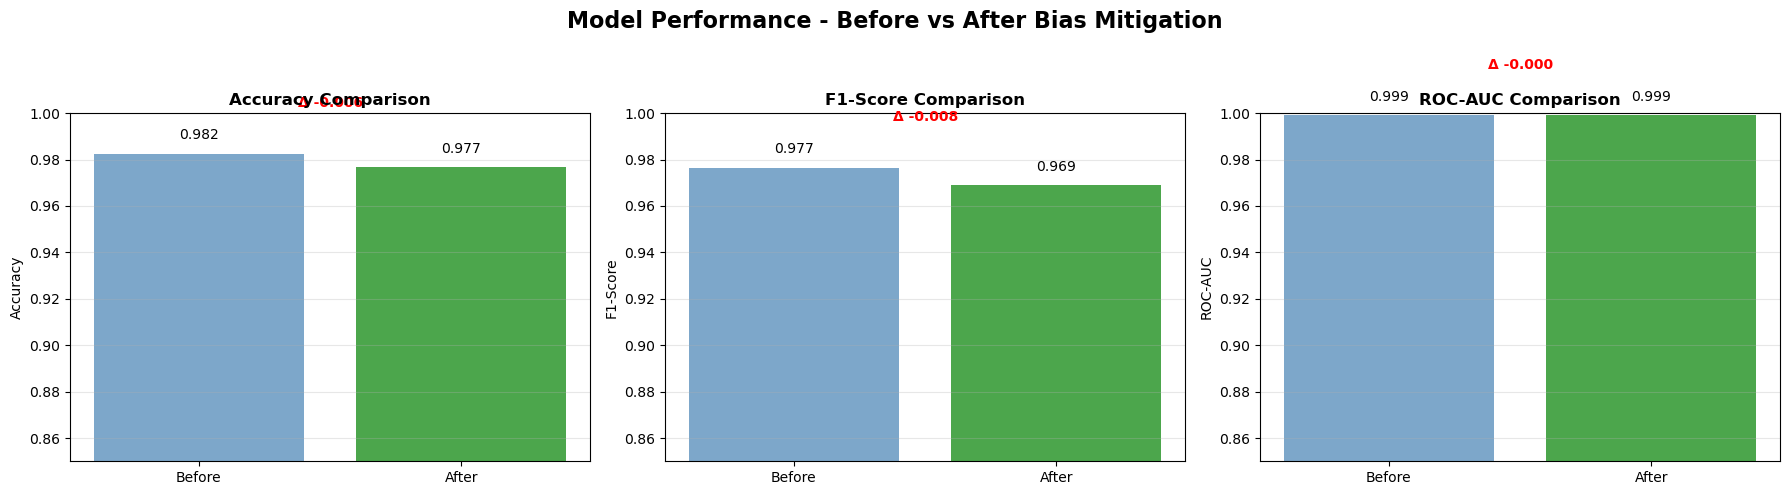


⚖️  FAIRNESS COMPARISON - Education:

Education:

  Selection Rates:
    Group 0: 0.348 → 0.353 (Δ +0.005)
    Group 1: 0.392 → 0.399 (Δ +0.007)


In [95]:
# Model performance comparison
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

accuracy_before = accuracy_score(y_test, results[best_model_name]['predictions'])
accuracy_after = accuracy_score(y_test, y_pred_mitigated)

f1_before = f1_score(y_test, results[best_model_name]['predictions'])
f1_after = f1_score(y_test, y_pred_mitigated)

roc_auc_before = roc_auc_score(y_test, results[best_model_name]['probabilities'])
roc_auc_after = roc_auc_score(y_test, y_pred_proba_mitigated)

print("\n📊 MODEL PERFORMANCE COMPARISON:")
print(f"\n  Accuracy:  {accuracy_before:.4f} → {accuracy_after:.4f} (Δ {accuracy_after-accuracy_before:+.4f})")
print(f"  F1-Score:  {f1_before:.4f} → {f1_after:.4f} (Δ {f1_after-f1_before:+.4f})")
print(f"  ROC-AUC:   {roc_auc_before:.4f} → {roc_auc_after:.4f} (Δ {roc_auc_after-roc_auc_before:+.4f})")

# Visualize performance comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['Accuracy', 'F1-Score', 'ROC-AUC']
before_values = [accuracy_before, f1_before, roc_auc_before]
after_values = [accuracy_after, f1_after, roc_auc_after]

for idx, (metric, before, after) in enumerate(zip(metrics, before_values, after_values)):
    axes[idx].bar(['Before', 'After'], [before, after], 
                  color=['steelblue', 'green'], alpha=0.7)
    axes[idx].set_ylabel(metric)
    axes[idx].set_title(f'{metric} Comparison', fontweight='bold')
    axes[idx].set_ylim([0.85, 1.0])
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add value labels
    axes[idx].text(0, before + 0.005, f'{before:.3f}', ha='center', va='bottom')
    axes[idx].text(1, after + 0.005, f'{after:.3f}', ha='center', va='bottom')
    
    # Add difference
    diff = after - before
    color = 'green' if diff >= 0 else 'red'
    axes[idx].text(0.5, max(before, after) + 0.02, f'Δ {diff:+.3f}', 
                  ha='center', color=color, fontweight='bold')

plt.suptitle('Model Performance - Before vs After Bias Mitigation', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Fairness metrics comparison for mitigation attribute
print(f"\n⚖️  FAIRNESS COMPARISON - {mitigation_attr_name}:")

for attr_name in [mitigation_attr_name]:
    if attr_name in fairness_before and attr_name in fairness_after:
        print(f"\n{attr_name}:")
        
        # Get groups
        groups_before = list(fairness_before[attr_name].keys())
        
        # Compare selection rates
        print("\n  Selection Rates:")
        for group in groups_before:
            before_sr = fairness_before[attr_name][group]['Selection Rate']
            after_sr = fairness_after[attr_name][group]['Selection Rate']
            print(f"    Group {group}: {before_sr:.3f} → {after_sr:.3f} (Δ {after_sr-before_sr:+.3f})")
        
        # Compare disparate impact
        if attr_name in disparities_before and attr_name in disparities_after:
            print("\n  Disparate Impact Ratios:")
            for pair in disparities_before[attr_name].keys():
                if pair in disparities_after[attr_name]:
                    before_di = disparities_before[attr_name][pair]['Disparate Impact Ratio']
                    after_di = disparities_after[attr_name][pair]['Disparate Impact Ratio']
                    print(f"    {pair}: {before_di:.3f} → {after_di:.3f} (Δ {after_di-before_di:+.3f})")
                    
                    if before_di < 0.8 and after_di >= 0.8:
                        print(f"      ✅ BIAS MITIGATED (now >= 0.8 threshold)")
                    elif before_di < 0.8 and after_di < 0.8:
                        print(f"      ⚠️  Still below threshold but improved")

